# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

According the International Data Corporation (IDC) used smartphone (including officially refurbished) shipments amounted to 206.7 million units. In a more recent report, Mordor Intelligence valued the used and refurbished smartphone market at 251.09 million units in 2021 and forecasts that the growth to reach 459.86 million by 2027. That is, a compound annual growth rate (CAGR) 10.32%. This upward trend in the demand for used smartphones and devices maybe due to the dismantling of the stigma surrounding the purchase of pre-owned smartphones and devices. 

The regularity of multiple product launches has also led to an increase in the supply stream for used smartphones and devices thereby increasing the used smartphones stock. Nowadays, most smartphones are supported with software updates for years after their initial launch further incentivising buyers to opt for used smartphones at cheaper prices.
Refurbished and used smartphones have become easy to acquire on popular e-commerce platforms like Amazon, Ebay, Alibaba and Aliexpress. Buyers can easily shop around for the best deals before making purchases. The COVID-19 pandemic also exacerbated the demand for used smartphones and devices. As people had less disposable income, it became essential to revise their expenses.

Apart from the benefit to the buyers, the issue of e-waste can finally be addressed. This is a huge benefit to the environment. As consumers settle for used or refurbished phones, the rate of e-waste generation can be slowed down to a controllable level. 

 
### Objective

Recell is a startup that plans to develop a dynamic pricing system that can predict the prices of used and refurbished smartphones and devices based on some independent variables by using machine learning to understand the relationship between the predictors and price, and build a linear regression model with the most significant predictors which are able to influence the price of used and refurbished smartphones. 

### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
# Mount the drive from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the data and create a DataFrame
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 3 - Linear Regression /Project/used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
# return the first 5 rows and check consistency
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
# return the last 5 rows and check consistency
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


Observations:

The DataFrame has 15 columns as mentioned in the Data Dictionary. Data in each row corresponds to new price, used price, RAM, internal memory, battery ratings, weight, release year, days used, OS, screen size, brand and whether phones and tablets supports 4g or 5g.
Data in each row is consistent with the corresponding column headings.

In [6]:
# see the total number of entries (that is, rows and columns)
data.shape

(3454, 15)

Observations:

The DataFrame has 3,454 rows and 15 columns. This represents the features of each device.

In [7]:
# print the summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observations:

- Some features like main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight seem to have null observations.

- The dataset contains 15 columns: 2 are integer type ('release year' and 'days used'), 4 are of object type ('brand_name', 'os', '4g' and '5g') and 9 of float type ('screen_size', 'main_camera_mp', selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'normalized_used_price', and 'normalized_new_price').

- Total memory usage is approximately 404.9 KB.

In [8]:
# Get the summary statistics of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


Observations:

* All the screen sizes of phones and tablets in the dataset range from 5cm to 31cm.

* 50% of main cameras are greater than 8MP while 50% of selfie cameras are less than 5MP.

* Average internal memory is 55GB, however, 50% of most devices'internal memory is less than 32GB.

* The average RAM of phones and tablets 4GB while the maximum and minimum RAM are 12GB and 0.02GB (20MB) respectively. 

* Battery ratings (in mAh) range from 500mAh to 9720mAh. 50% of batteries are greater than 3000mAh.
 
* Minimum and maximum weight of devices in grams are 69g and 855g respectively.

* 75% of devices were released between year 2013 and year 2018. All the devices were released no later than year 2020.

* Average days used for the devices is 675 days. 50% of devices have been used for more than 691 days.

* Normalised price of used devices range from 1.54 Euros to 6.62 Euros while normalised price new devices range from 2.90 Euros to 7.85 Euros. 50% normalised new price is greater than 5.24 Euros while 50% of normalised used price is less than 4.41 Euros.

In [9]:
# check if there are any duplicates across any rows in the entries
data.duplicated().sum()

0

Observations:

There are no duplicate entries in the dataset.

In [10]:
# check for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations:

* main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight all have missing values.

In [11]:
# create a copy of the original DataFrame 
df = data.copy()
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

Write a function to plot the histograms and boxplots.

In [12]:
# Define a function to plot histograms and boxplots
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="orange"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# Define a function to create  boxplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Number of Brands

In [14]:
# count the number of phone and tablets brands on demand
data.brand_name.nunique()

34

Observations:

* There 34 brands represented in the dataset

#### Number of devices per brand

In [15]:
# count the number of phones and tablets for each brand
data[[('brand_name')]].value_counts()

brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Vivo          117
Micromax      117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Microsoft      22
OnePlus        22
Coolpad        22
BlackBerry     22
Google         15
Infinix        10
dtype: int64

Observations:

* Apart from the unknown brand names, Samsung, Huawei, LG are the top 3 brands in demand while Blackberry, Google and Infinix are the least 3 brands in demand.

* This will be checked again after treating missing values.

#### Normalised Used Price

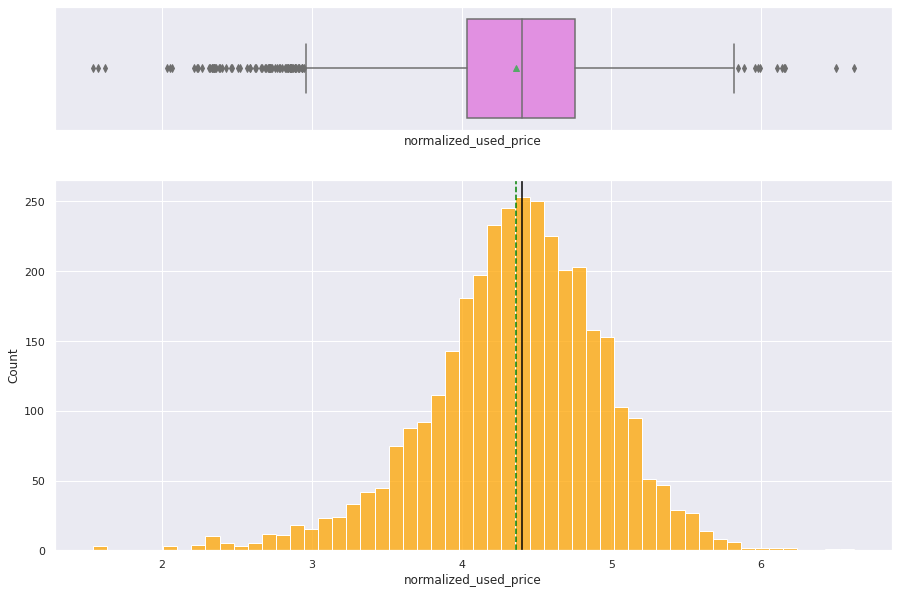

In [16]:
# Create the boxplot and histogram for the normalized used price
histogram_boxplot(df, "normalized_used_price")

Observations:

* From the histrogram, the distribution of normalised used price is slightly left-skewed. Some used devices are priced less than 3 Euros (normalised).

* The mode of the distribution indicates the normalised used price of most devices cost between 4 and 5 Euros (normalised price).

* There are outliers. A few used devices cost more than 6 Euros while some also cost less than 3 Euros.

* The median of normalised used price is 4.41 Euros while with an average of 4.36 Euros. That is, 50% of most of the used devices are priced at 4.41 Euros (normalised) and above.

#### Normalised New Price

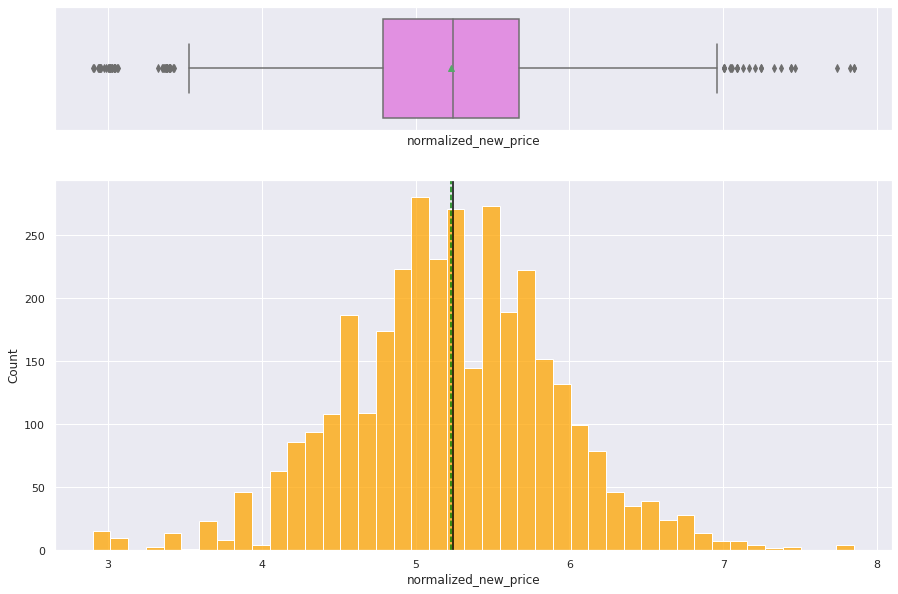

In [17]:
# create histogram and boxplot for the nomalized new price
histogram_boxplot(df, "normalized_new_price")

Observations:

* From the histrogram, the distribution of normalised new price is almost normally distributed.

* The normalised price for most new devices cost between 4 ~ 6 Euros.

* Outliers exist in the distribution. A few new devices cost more than 7 Euros while some also cost less than 3 Euros.

* 50% of normalised price of new devices are greater than 5.25 Euros while the normalised new price averages around 5.23 Euros.

#### Screen Size

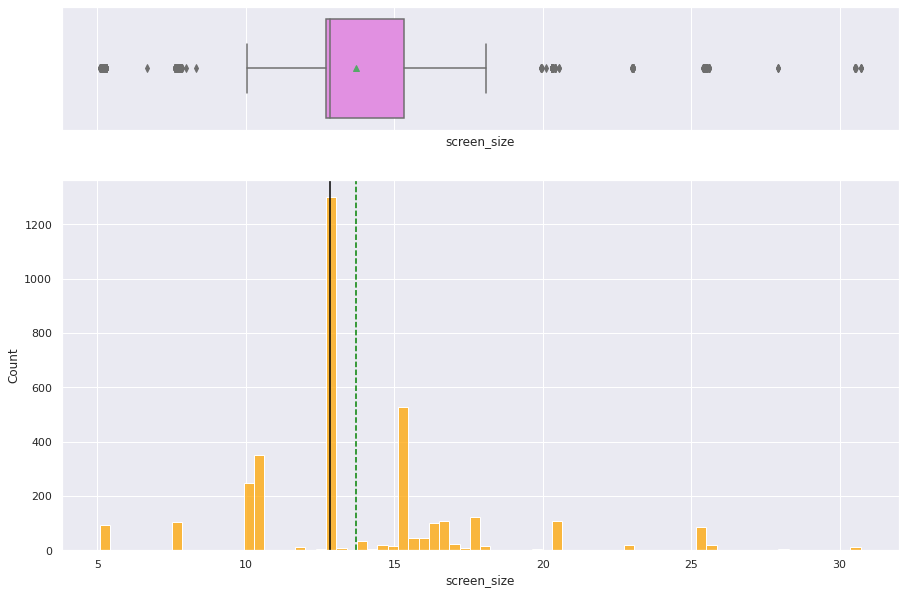

In [18]:
# create histogram and boxplot for screen size
histogram_boxplot(df, "screen_size")

Observations:

* From the histrogram, the distribution of screen size is right-skewed.

* The largest screen sizes is 30cm while the smallest screen size is around 5cm.

* 50% of all screen sizes are bigger than 12cm, most screen sizes are within 10cm - 20cm although outliers exist with screen sizes bigger than 20cm and less than 10cm.

#### Main Camera

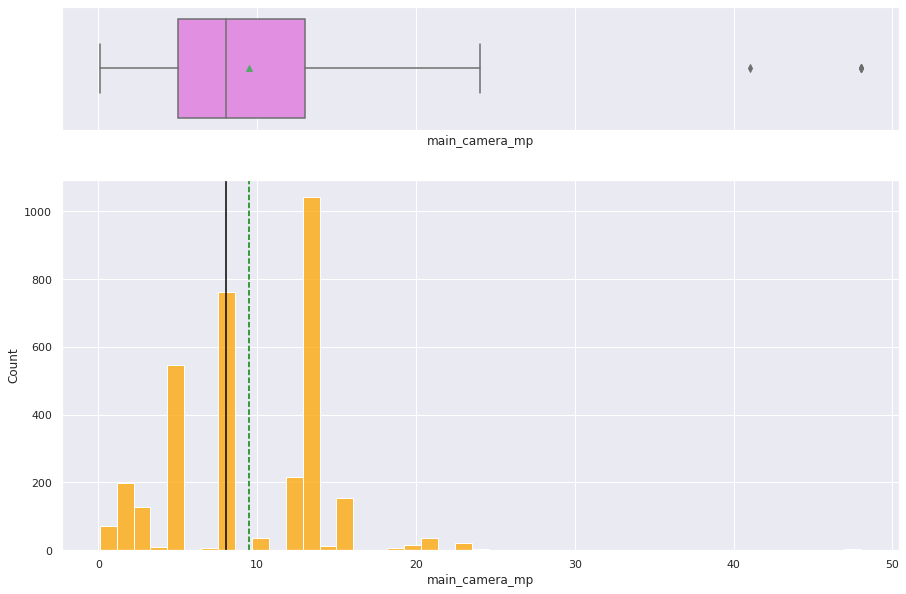

In [19]:
# create histogram and boxplot for main camera
histogram_boxplot(df, "main_camera_mp")

Observations:

* From the histrogram, the distribution of main camera pixels is right-skewed.

* On average the megapixels (MP) of main cameras is about 9.5MP although there exist some outliers.

* The highest MP for main camera is about 48MP.

#### Selfie Camera

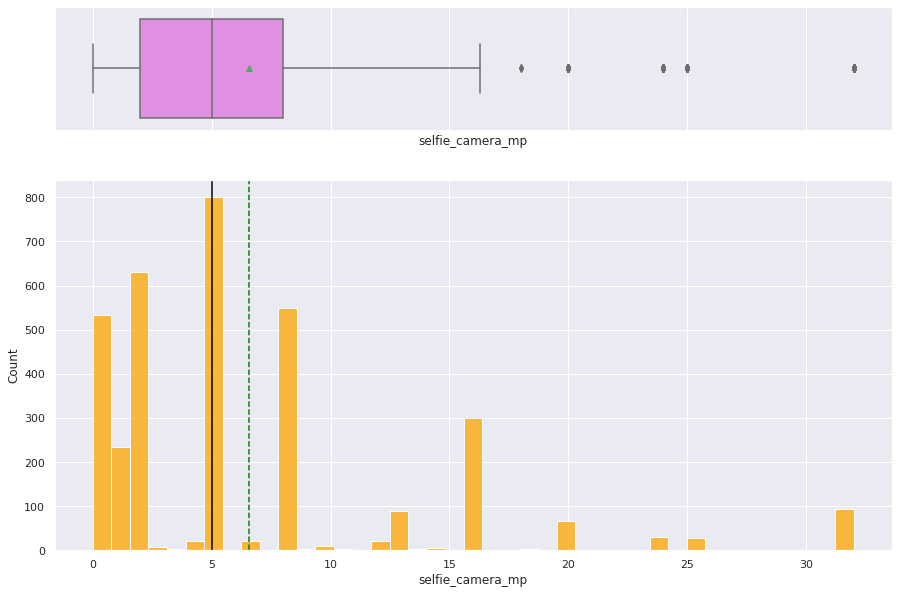

In [20]:
# create histogram and boxplot for selfie cameras
histogram_boxplot(df, "selfie_camera_mp")

Observations:

* From the histrogram, the distribution of selfie camera pixels is right-skewed.

* The average MP for selfie camera is 6.55MP however, the median MP for selfie camera is 5MP

* There exist outliers that occur from about 17MP.

#### Internal Memory

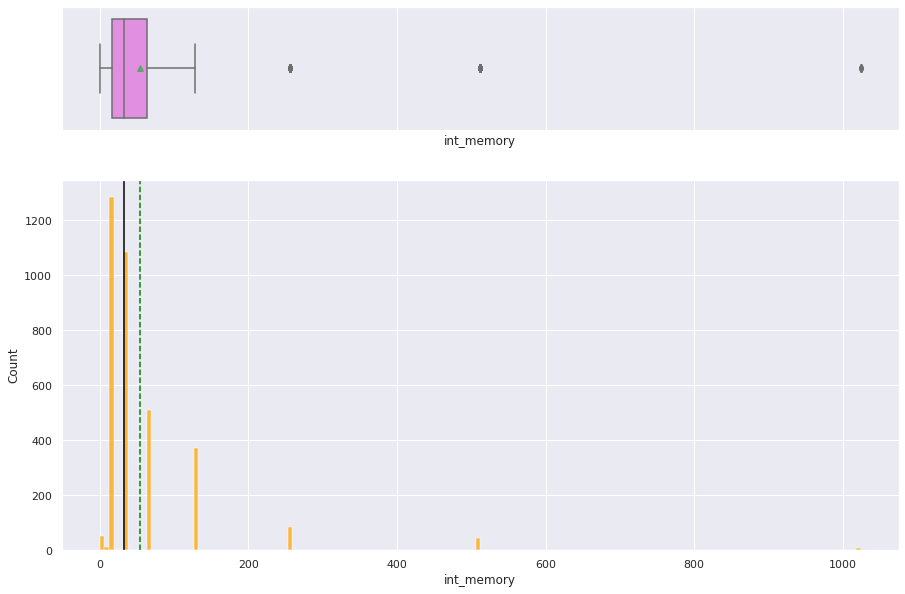

In [21]:
# create histogram and boxplot for phones and tablets internal memories
histogram_boxplot(df, "int_memory")

Observations:

* From the histrogram, the distribution of int_memory is right-skewed.

* 50% of the internal memory for phones and tablets is less than 32GB.

* There also exist outliers in the distribution.

* The average of internal memory is 54.6GB, however, the maximum internal memory is 1024GB and minimum is 0.01 GB

#### RAM

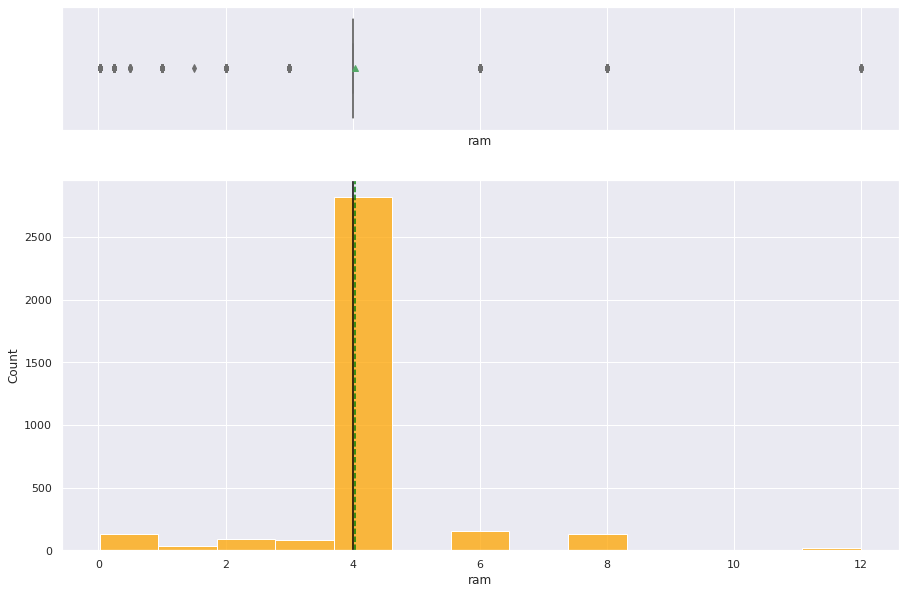

In [22]:
# create histogram and boxplot for the RAM
histogram_boxplot(df, "ram")

Observations:

* There's high presence of outliers in the distribution

* More than 50% of RAM are about 4 GB. Only the top 25% of devices have RAM greater than 4GB and remaining bottom 25% less than 4GB respectively.

* The lowest RAM is 1.4GB.

#### Weight

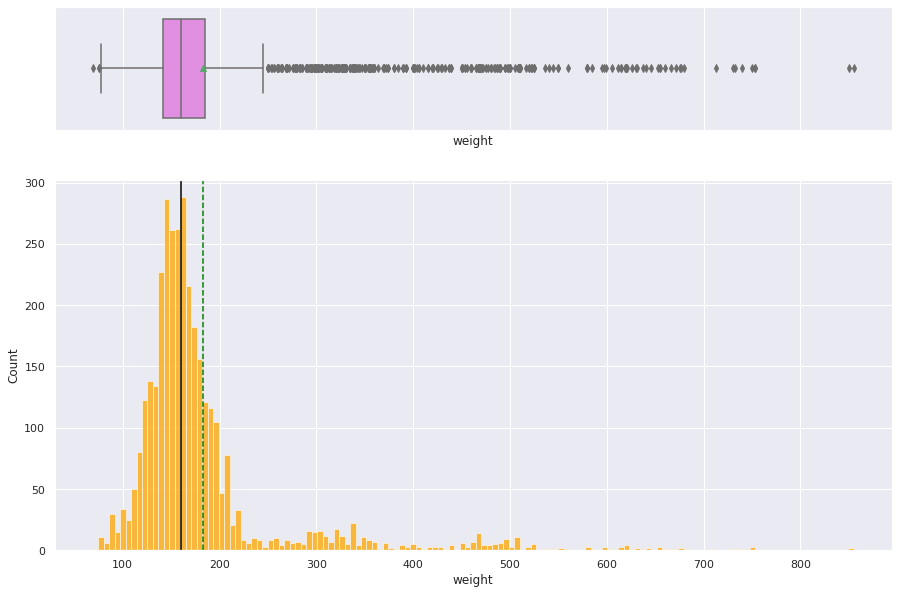

In [23]:
# create histogram and boxplot for weights of phones and tablets
histogram_boxplot(df, "weight")

Observations:

* The histogram for the weight distribution is heavily right-skewed.

* 50% of devices weigh more than 160g. The device with the largest weight weighs 855g while the device(s) with the lowest weight weighs 182g.

* The average weight of devices is 183g.

#### Battery

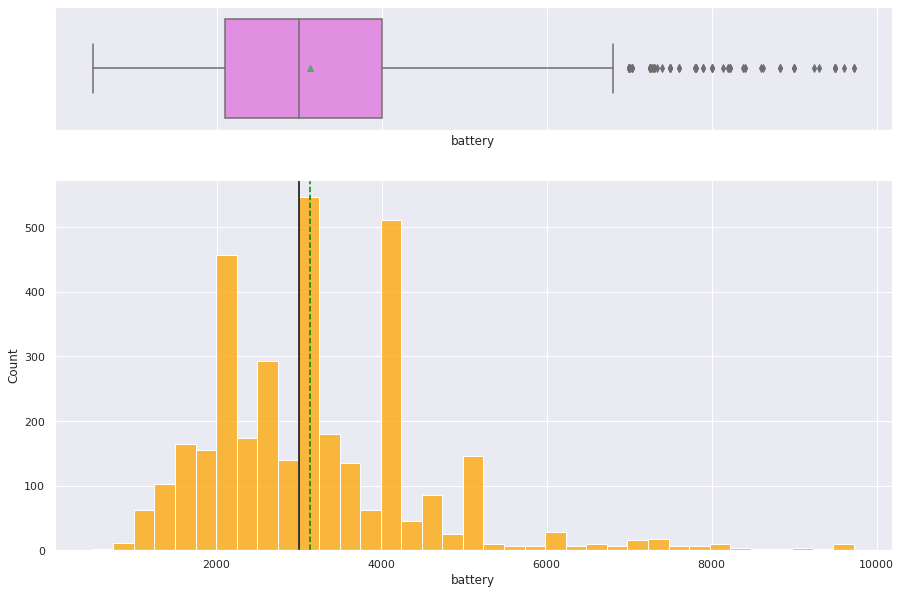

In [24]:
# create histogram and boxplot for the batteries
histogram_boxplot(df, "battery")

Observations:

* The distribution for battery is right-skewed.

* Most devices have battery ranging between 1800mAh - 4500mAh

* The lowest battery has energy of 500mAh while the average energy rating of battery is 3133mAh.

* 50% of batteries have energy rating greater than 3000mAh.

#### Days Used

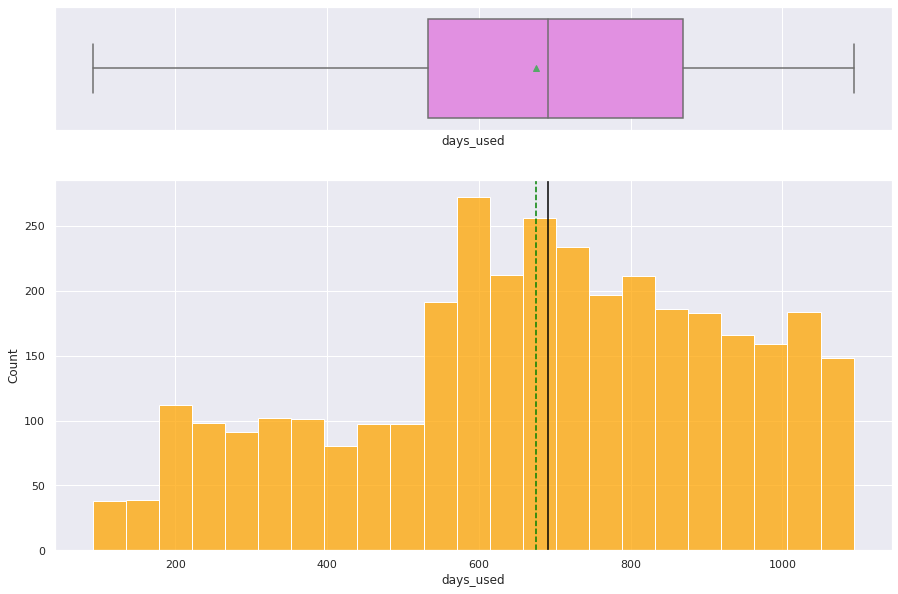

In [25]:
# create histogram and boxplot for the number of days the phones and tablest have been used
histogram_boxplot(df, "days_used")

Observations:

* 50% of the phones and tablets have been used for at least 690 days while the remaining devices have been used for less than 690 days.

* Oldest used phones and tablets have been used for up to 1094 days.

* The least used device have been used for only 91 days.

#### Brand name

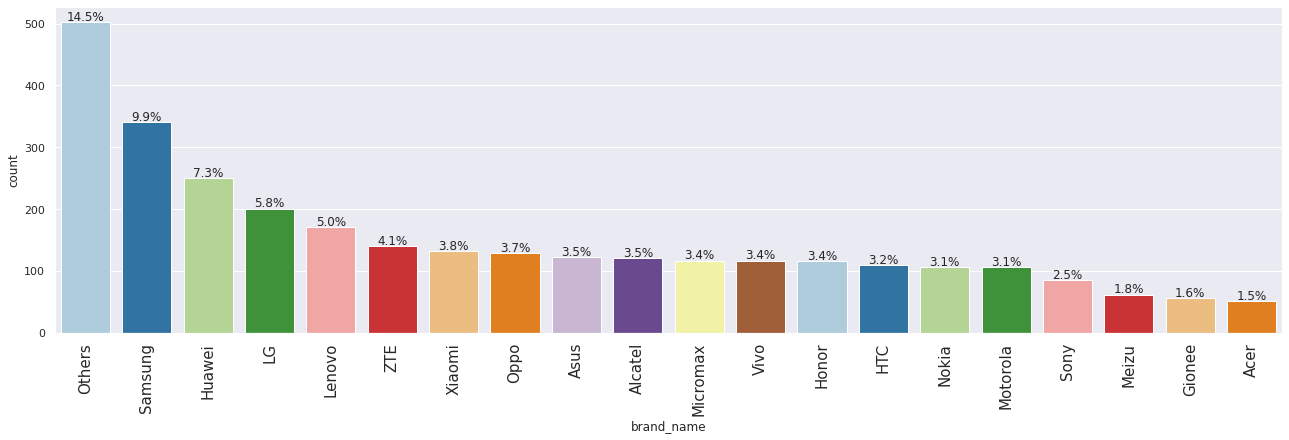

In [26]:
# Visualise the brands that are in demand and their percentages
labeled_barplot(df, "brand_name", perc=True,n=20)

Observations:

* Apart from the unknown brands, Samsung, Huawei and LG are the most demanded brands with 9.9%, 7.3% and 5.8% respectively.

* The top 20 most demanded brands (in descending order) are Samsung, Huawei, LG, Lenovo, ZTE, Xiaomi, Oppo, Asus, Alcatel, Micromax, Vivo, Honor, HTC, Nokia, Motorola, Sony, Meizu, Gionee, Acer.

#### OS

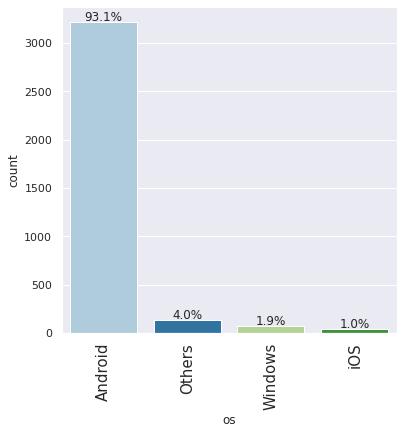

In [27]:
# Visualise the distribution of the OS
labeled_barplot(df,'os', perc=True)

Observations:

* More than 93% of the devices run on the Android OS. This is most likely because most of the devices run on the Android OS.

* iOS is the least OS used in devices. This is most likely because only Apple devices run on iOS.

#### 4G and 5G

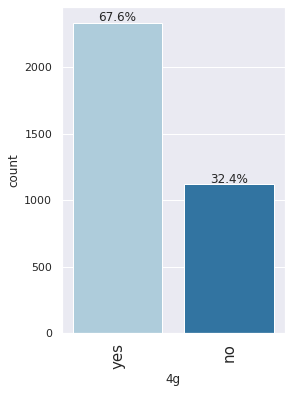

In [28]:
# Visualise the distribution of 4g devices
labeled_barplot(df,'4g', perc=True)

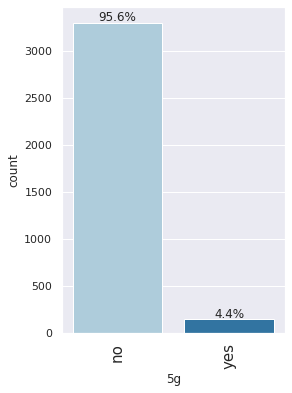

In [29]:
# Visualise the distribution of 5g devices
labeled_barplot(df,'5g', perc=True)

Observations:

* 67.6% of the devices are 4G enabled while 4.4% of devices are 5G enabled.



#### Release Year

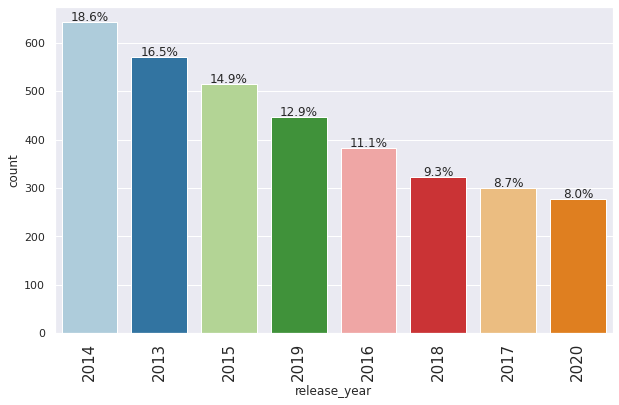

In [30]:
# Visualise the numbers of devices according to year released
labeled_barplot(df,'release_year', perc=True)

Observations:

* 18.6% of the devices were released in year 2014.

* Only 8% of devices were released in year 2020.

* The quantity of phones and tablets decreases as the year increase. Therefore, 2020 has the least number of devices released.

### Bivariate Analysis

#### Brand name VS RAM

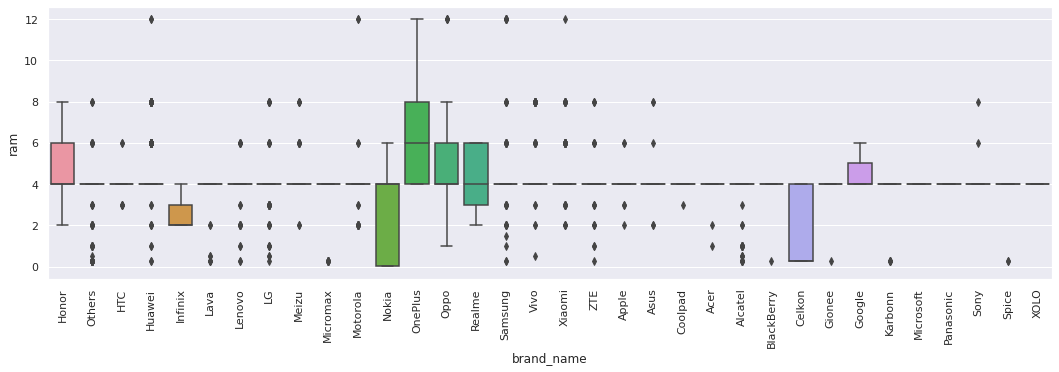

In [31]:
# Visualise the median, maximum, minimum, first and third quartiles of RAM according to the brands
plt.figure(figsize=(18, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

Observations:

* Most of the RAM across all the brands have outliers.
* Most brands produce most of their devices with 4 GB RAM apart from Honor, Infinix, Nokia, OnePlus, Oppo, Realme, Celkon and Google. However, these brands still produce devices with low and high RAM as seen in the outliers.
* Celkon brand does not produce devices having RAM greater than 4 GB while Microsoft, Panasonic and XOLO only produce devices having 4 GB.
* 50% of devices produced by Honor and Oppo have RAM between 4 GB and 6GB.
* Nokia does not produce phones or tablets with RAM greater than 6 GB and it has no outliers. Nokia produces the devices with the lowest RAM.

#### Numerial Columns Correlations

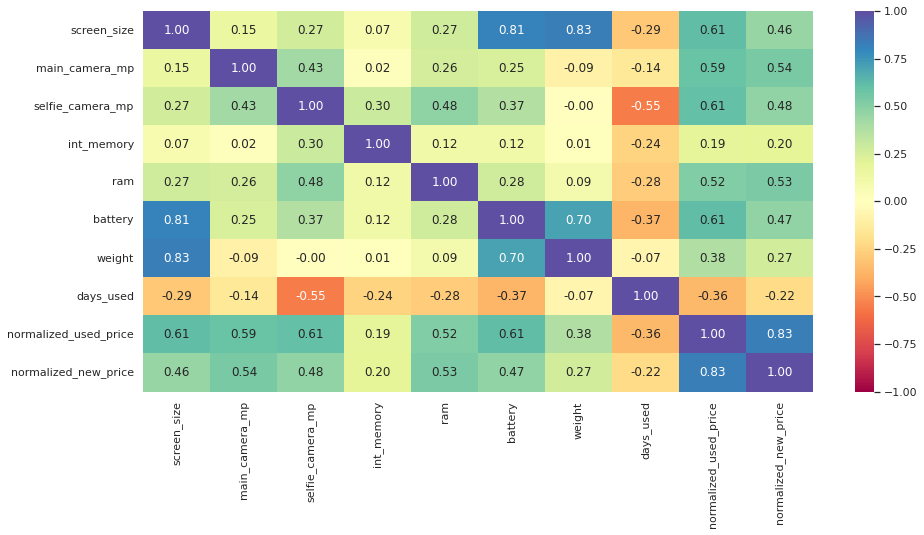

In [32]:
# Visualise the correlation among the numerical variables in the dataset
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation:

* Screen size and weight has the highest correlations at 0.83 followed by screen size and battery at 0.81. Screen size is positively correlated with weight and battery.

* Normalized prices of used devices and nomalized prices of new devices are highly positively correlated at 0.83. Although Normalised prices of used devices is moderately correlated with screen size, main camera, selfie camera and batteries.

* Days Used has the lowest correlation with selfie camera. Days used and selfie camera are negatively correlated.

#### Batteries with energy rating greater than 4500mAh

In [33]:
# Determine the total number of batteries with rating greater than 4500mAh
df_large_battery = df[df['battery'] > 4500]
df_large_battery.shape[0]

341

Observation:

* There are 341 devices with batteries greater than 4500mAh

#### Scatter plot - Weight VS Battery (Greater than 4500mAh)

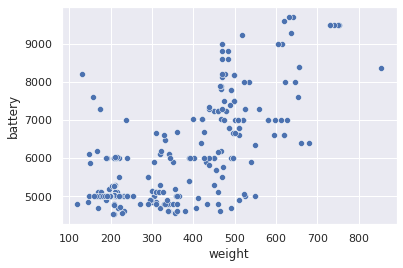

In [34]:
# Depict the scatterplot for weight and battery
sns.scatterplot(data=df_large_battery, x="weight", y="battery")
plt.show()

Observation:

* There seems to be a positive relationship between weight and battery for batteries having more than 4500mAh energy rating.

* An annotated correlation plot will give more insight with other variables.

#### Correlation plot - Weight VS Battery (Greater than 4500mAh)

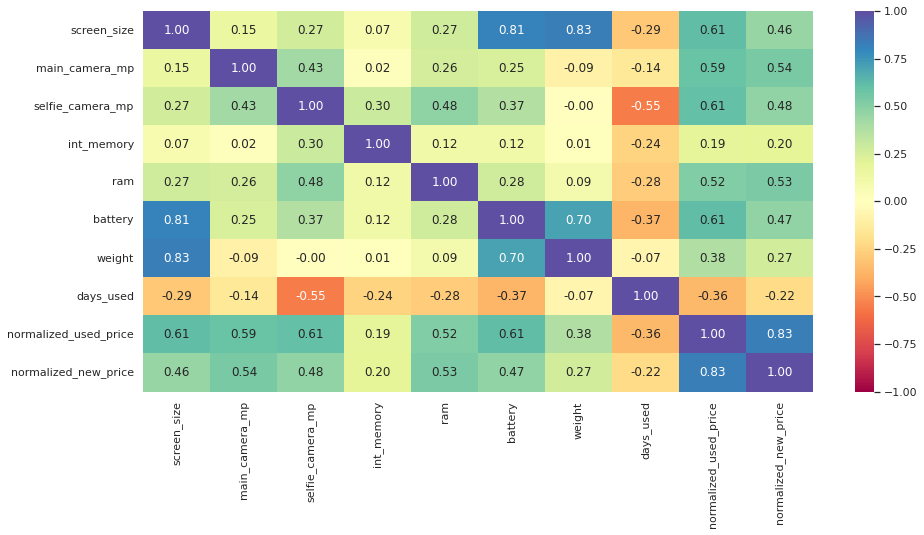

In [35]:
# Visualise the correlation among the numerical variables for batteries with ratings greater than 4500mAh
cols_list_large_battery = df_large_battery.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list_large_battery.remove('release_year')

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list_large_battery].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

plt.show()

Observation:

* Battery and Weight are positively correlated at 81%. The larger the battery energy ratings, the higher their weights.

* Therefore devices with larger batteries have greater weight and are heavier compared to those with batteries with lesser energy ratings in mAh.

#### Comparison of Weight and Brand name (Batteries Greater than 4500mAh)

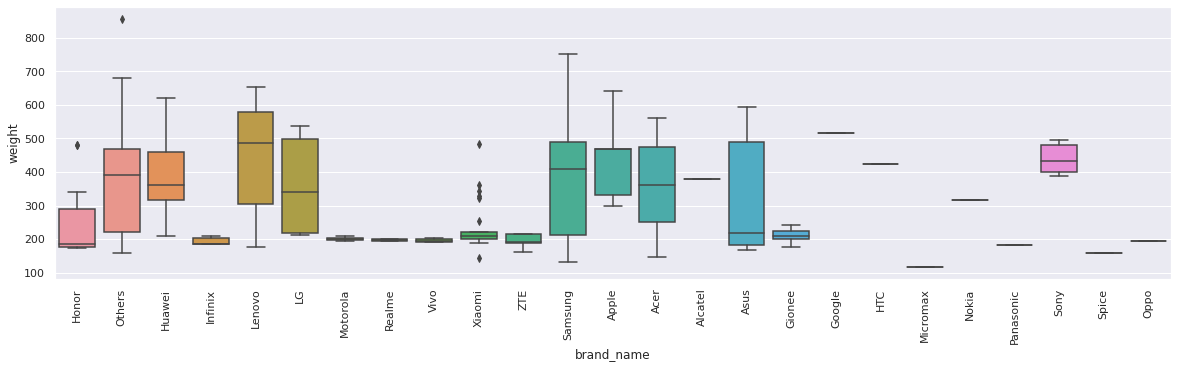

In [36]:
# Visualise the median, maximum, minimum, first and third quartiles of weight according to the brands
# for batteries with ratings greater than 4500mAh
plt.figure(figsize=(20, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

Observation:

* Samsung devices have the most batteries greater than 4500mAh and the highest weight.

* Micromax has the lowest weight among all the brands with batteries 4500mAh and greater.

* 50% of LG devices weigh between 200g - 500g.

* Although most Xiaomi devices weigh around 200g there exist some outliers for Xiaomi devices.

* 50% of Asus and Samsung devices weigh between 200g and 500g.

* In general, most devices weigh between 200g and 500g

#### Number of Phones with Screen Size Greater than 6 inches.

In [37]:
# Determine the total number of devices with screen size greater than 6 inches
df_large_screen = df[df['screen_size'] > 6*2.54] # convert 6 inches to cm
df_large_screen.shape[0]

1099

Observation:

* There are 1099 devices with screen size greater than 6 inches.

#### Distribution for Screen Size Greater than 6 inches.

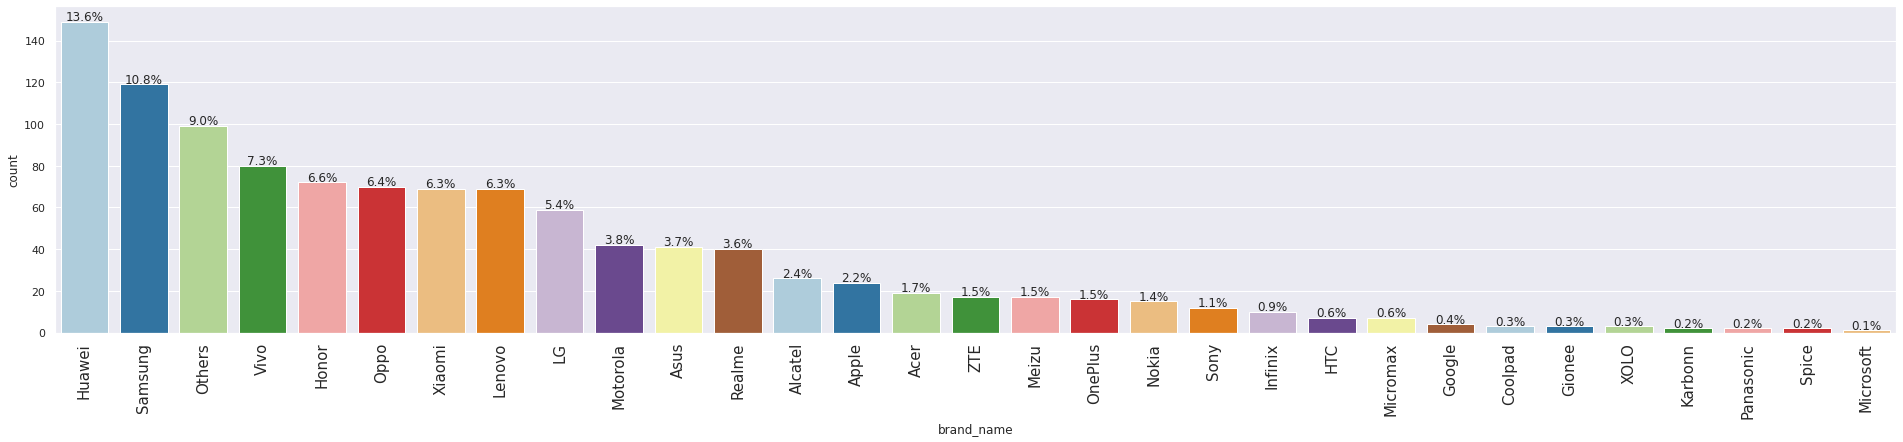

In [38]:
# Visualise the distribution of phones and tablets having screen size greater than 6 inches
labeled_barplot(df_large_screen,'brand_name', perc=True) 

Observation:

* Huawei brand has more devices with screen size larger than 6 inches than any other brand in the dataset at 13.6%.

* Samsung comes next with 10.8% of all devices with screen size greater than 6 inches.

* Panasonic, Spice and Microsoft are the bottom 3 brands of all the brands having screen size greater than 6 inches.

#### Comparison of Screen Size and Brand name (Batteries Greater than 4500mAh)

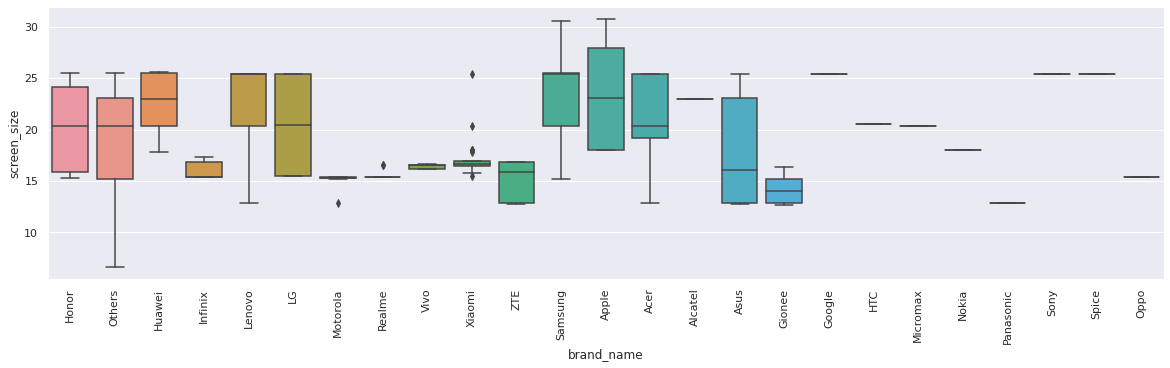

In [39]:
# Visualise the median, maximum, minimum, first and third quartiles of phones and tablets screen size according to the brands
# for batteries with ratings greater than 4500mAh
plt.figure(figsize=(20, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

Observation:

* Apple devices have the largest screen size of all the brands in the dataset. However, so much different from Samsung. The median screen size of Apple screens is around 22.5cm.

* 50% of Samsung devices have screens larger than 25cm. The bottom 25% of Samsung devices have screen sizes between 15cm and 20cm.

* Devices of unknown brands have the lowest screen sizes lower than 5cm.

* HTC and Micromax have all screen sizes of devices around 21cm while all Sony and Spice devices have screen sizes around 25cm. 

* All LG phones have screen sizes between 15cm and 25cm which also happens to be the interquartile range.

#### Number of Phones with Selfie Camera Greater than 8MP

In [40]:
# Determine the total number of tablets and phones having selfie cameras greater than 8MP
df_selfie_camera_mp = df[df['selfie_camera_mp'] > 8]
df_selfie_camera_mp.shape[0]

655

Observation:

* There are 655 devices with selfie camera greater than 8MP.

#### Distribution of Devices with Selfie Camera Greater than 8MP

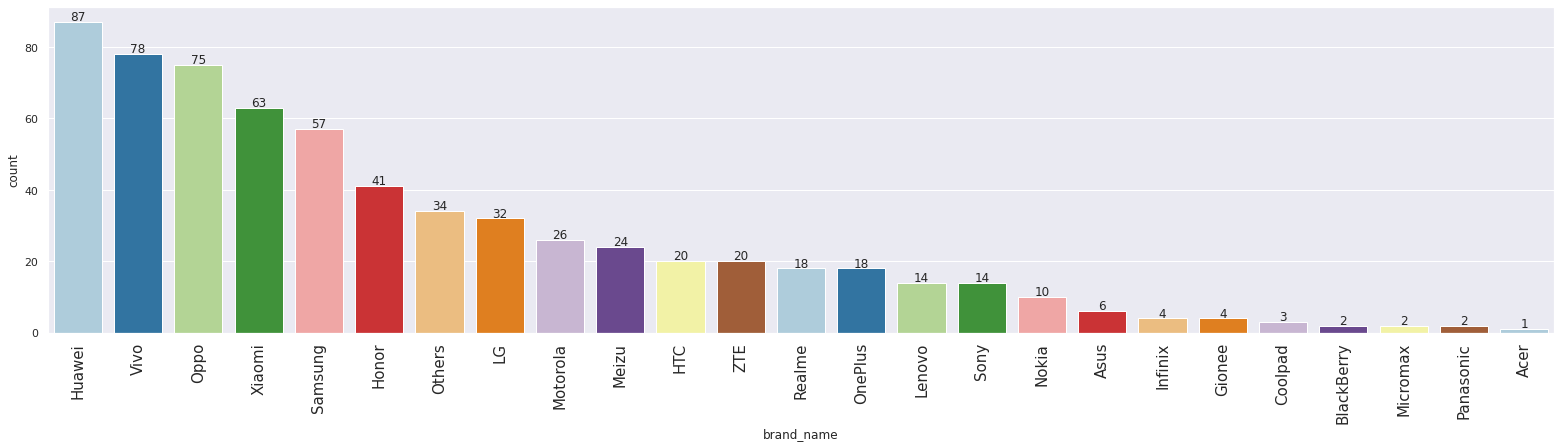

In [41]:
# Visualise the distribution of tablets and phones having selfie cameras of 8MP and above
labeled_barplot(df_selfie_camera_mp,'brand_name', perc=False)

Observation:

* Huawei, Vivo Oppo, Xiaomi, and Samsung are the devices with selfie camera greater than 8MP having 87, 78, 75, 63, and 57 devices respectively.

* The bottom 5 brands (in descending order) are Coolpad, Blackberry, Micromax, Panasonic and Acer with 3, 2, 2, 2, and 1 devices respectively.

#### Distribution of Devices with Main Camera Greater than 8MP

In [42]:
# Visualise the distribution of tablets and phones haveing main cameras of 8MP and above
df_main_camera_mp = df[df['main_camera_mp'] > 8]
df_main_camera_mp.shape[0]

1560

Observation:

* There are 1560 devices with main camera greater than 8MP.

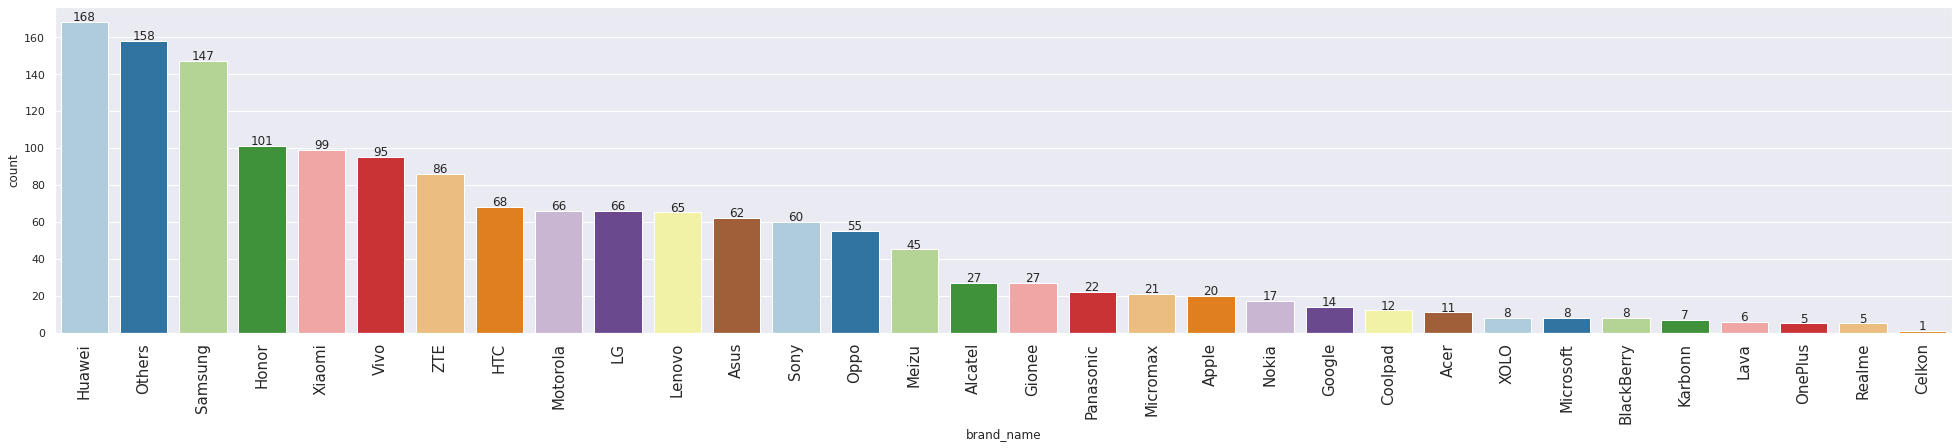

In [43]:
# Visualise the distribution of tablets and phones having main cameras of 8MP and above
labeled_barplot(df_main_camera_mp,'brand_name', perc=False)

Observation:

* Huawei, Others, Samsung, Honor, and Xiaomi, are the devices with main camera greater than 8MP having 168, 158, 147, 101, and 99 devices respectively.

* Karbonn, Lava, OnePlus, Realme, and Celkon are the least brands having 7, 6, 5, 5, 1 devices respectively.

####  Normalized Used Price VS Release Year

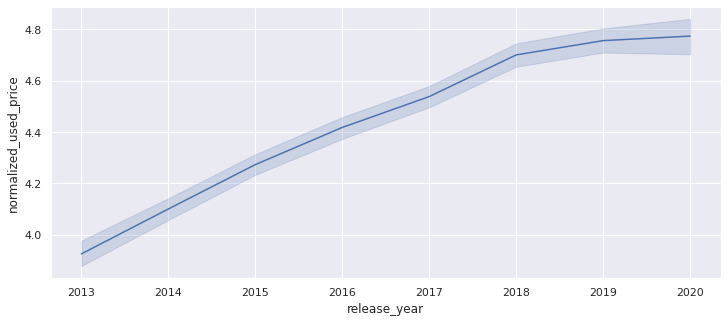

In [44]:
# Visualise normalised used price according to release year
plt.figure(figsize=(12, 5))
sns.lineplot(data = df, x = 'release_year', y = 'normalized_used_price')
plt.show()

Observation:

* There is a steady rise in normalised prices of used devices from about 4 Euros in 2013 up to 4.7 Euros in 2018. However, the rise slows down from 2018 to 2020 and peaks at 4.8 Euros.

#### Normalised Used Price VS 4G and 5G

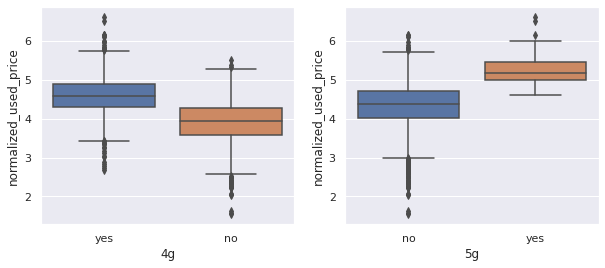

In [45]:
# Create boxplots
plt.figure(figsize=(10, 4))

# Create a boxplot for the normalised used price with respect to 4g capability
plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

# Create a boxplot for the normalised used price with respect to 5g capability
plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

Observation:

* 50% of 4G enabled devices have normalised used price greater than 4.5 Euros while 50% of devices without 4G cost less than 4 Euros.

* 50% of 5G-enabled devices have normalised used price greater than 5.2 Euros while 50% of those without 5G capability cost less than 4.5 Euros.

* 5G-enabled devices cost more than 4G-enabled devices with a cost difference of almost 1 Euro (normalised price).

* Lowest 5G-enabled device cost around 4.7 Euros while lowest 4G-enabled device cost around 3.5 Euros.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [46]:
# Create a new copy of the data
df1 = df.copy()

#### Checking for Missing Values

In [47]:
# Check if there are any missing entries
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observation:

* There are 179 missing values in main_camera_mp, 2 missing in selfie_camera_mp, 4 missing in int_memory, 4 missing in ram, 6 missing in battery, and 7 missing in weight.

#### Missing Values Treatment

In [48]:
# Make a list of columns with missing entries
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
# Write a loop to impute missing entries with the median of the specific columns
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name","release_year"])[col].transform("median")
    )   

# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observation:

* After imputing with the respective medians of the affected columns there still exist some missing values main_camera_mp, selfie_camera_mp, battery, and weight.

In [49]:
# Make a list of columns with missing entries
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]
# Write a loop to impute missing entries with the median of the specific columns
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name"])[col].transform("median")
    )   

# checking for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

Observation:

* There still exist 10 missing values in the main_camera_mp column.

In [50]:
# impute remaining missing entries with median of main camera MP
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())
# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

Observation:

* No more missing values.

#### Feature Engineering

Create new column "years_since_release" and delete the existing "release_year" column

In [51]:
# calculate number of years since release
df1["years_since_release"] = 2021 - df1["release_year"]
# drop 'release_year' column
df1.drop("release_year", axis=1, inplace=True)
# determine descriptive summary of years since release
df1["years_since_release"].describe().T


count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

Observation:

* 50% of devices have been released in the last 5.5 years. That is, they were released in year 2015 and later.

* The least number of years devices have been released is 1 year. That is, the latest phones and tablets were released in year 2020.

* The maximum number of years devices have been released is 8 years ago.

#### Outlier Detection and Treatment

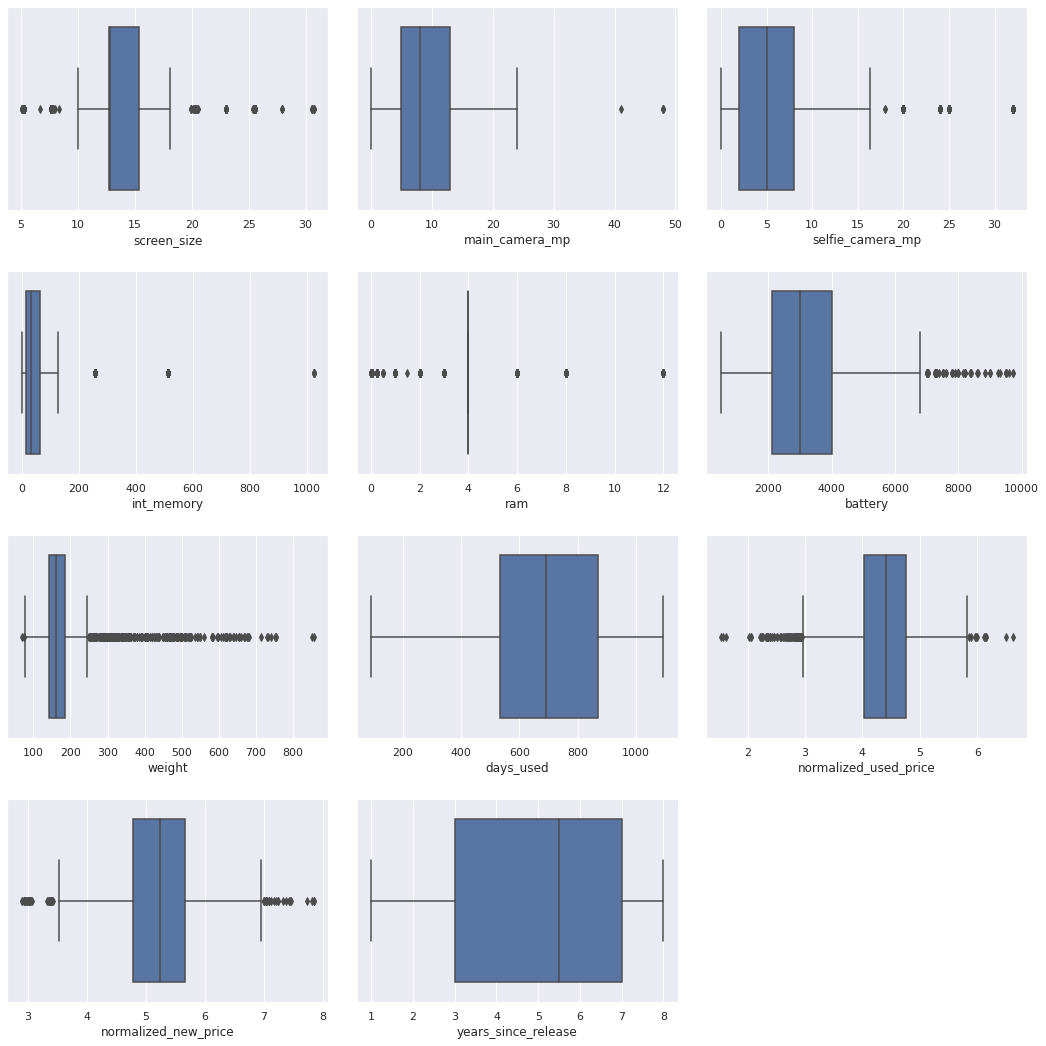

In [52]:
# create a list of numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))
# write a loop to create boxplots for the numerical columns
for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)
    

plt.show()

Observation:

* Outliers exist in all the columns except for 'years_since_release' and 'days_used'

* Features like normalize_new_price and normalize_used_price which deals with pricing will not be treated. As prices are usually determined by the brands and market forces.

* It is not out of order to have battery with energy rating greater than 10000mAh.

* All other features seem normal and therefore will not be treated.

#### Determine percentage of outliers in each column.

In [53]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df1[num_cols].quantile(0.25)
Q3 = df1[num_cols].quantile(0.75)

IQR = Q3 - Q1                   # Determine Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [54]:
# Percentage of outliers in each numerical columns
((df1[num_cols] < lower_whisker) | (df1[num_cols] > upper_whisker)).sum()/df1.shape[0]*100

screen_size              13.028373
main_camera_mp            0.144760
selfie_camera_mp          6.398379
int_memory                3.995368
ram                      18.500290
battery                   2.229299
weight                   10.654314
days_used                 0.000000
normalized_used_price     2.460915
normalized_new_price      1.910828
years_since_release       0.000000
dtype: float64

Observation:

* 'RAM' has the highest percentage of outliers at 18.5%, followed by 'screen_size' with 13% and 'weight' with 10.7%.

* Although there exist outliers in each of columns apart from 'days_used' and 'years_since_release'

* The affected columns will not be treated for outliers since the outlier values are not an aberration. For example, normalized_used_price is dependent on the brand therefore there may not be any consistent pattern across all brands to determine the price.

## EDA (Post Treatment of Missing Values)

### Univariate Analysis

#### Screen Size (Post Missing Value Treatment)

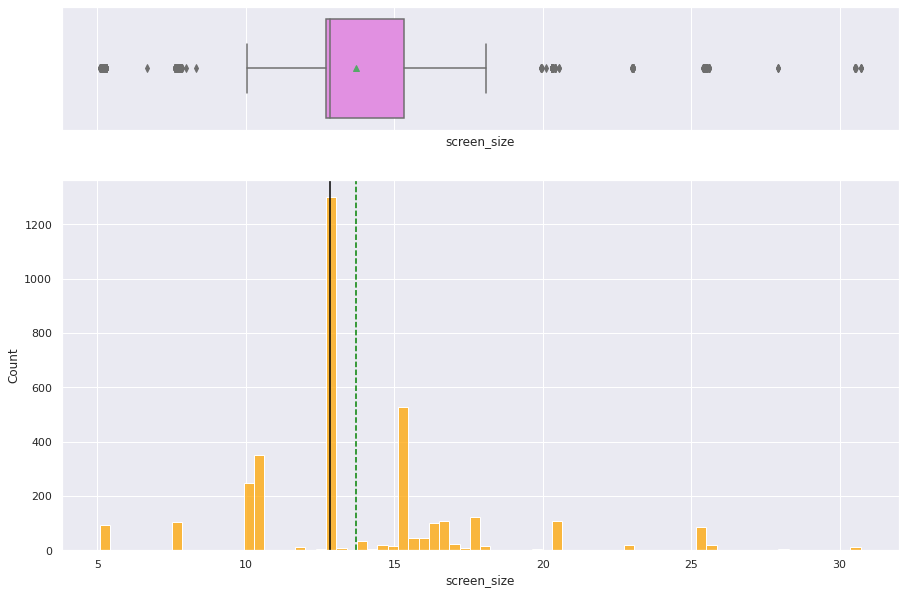

In [55]:
# create histogram and boxplot for the screen sizes
histogram_boxplot(df1, "screen_size")

Observation:

* The distribution of screen_size is not expected to change since there were no null values in the column.

#### Main Camera (Post Missing Value Treatment)

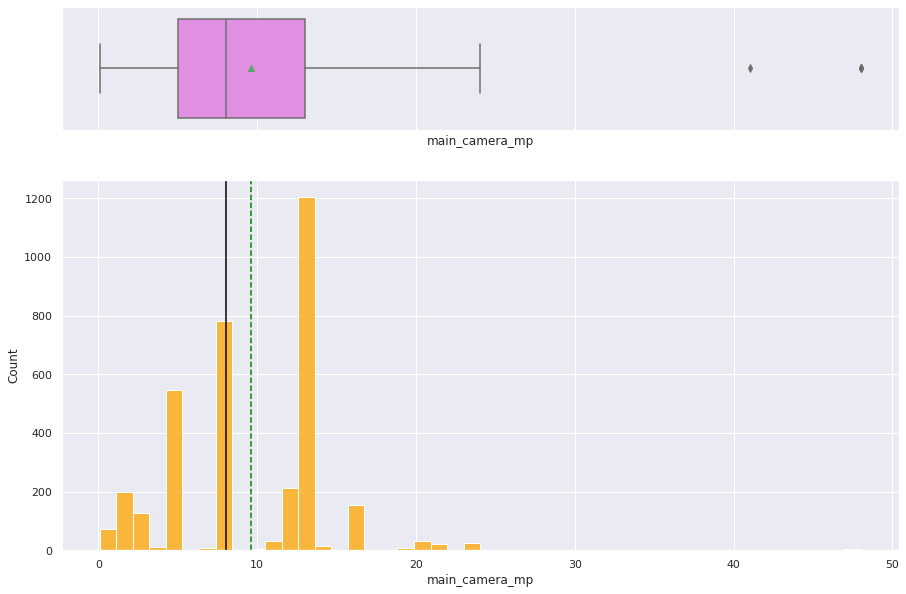

In [56]:
# create histogram and boxplot for the main camera MP
histogram_boxplot(df1, "main_camera_mp")

In [57]:
# Check the new mean and median
print('mean =', df1['main_camera_mp'].mean())
print('median =', df1['main_camera_mp'].median())

mean = 9.617596988998265
median = 8.0


Observation:

* The average of main_camera_mp increases slightly from 9.46MP to 9.62MP.

* The median still remains the same.

#### Selfie Camera (Post Missing Value Treatment)

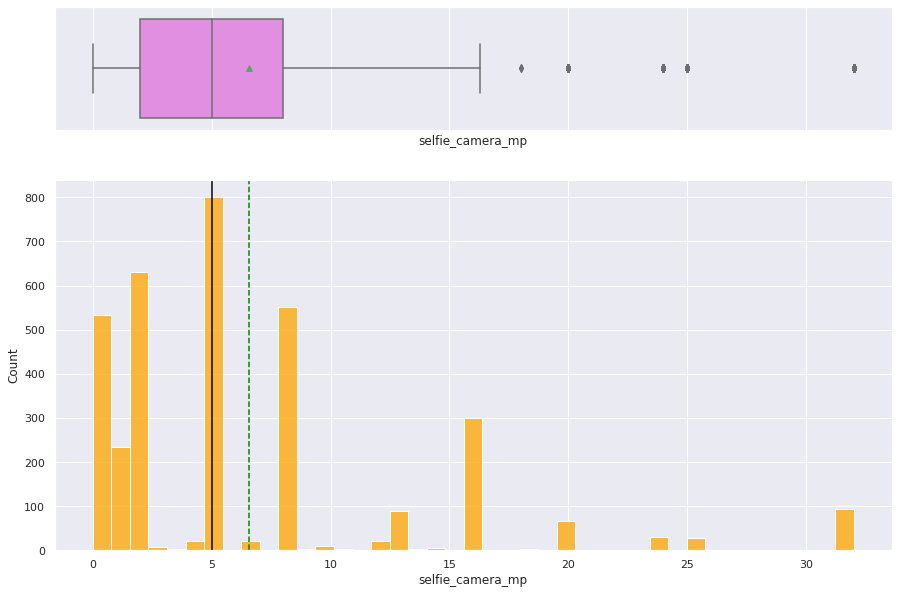

In [58]:
# create histogram and boxplot for the selfie camera MP
histogram_boxplot(df1, "selfie_camera_mp")

In [59]:
# Check the new mean and median
print('mean =', df1['selfie_camera_mp'].mean())
print('median =', df1['selfie_camera_mp'].median())

mean = 6.555066589461493
median = 5.0


Observation:

* The mean and median remain the same.

#### Internal Memory (Post Missing Value Treatment)

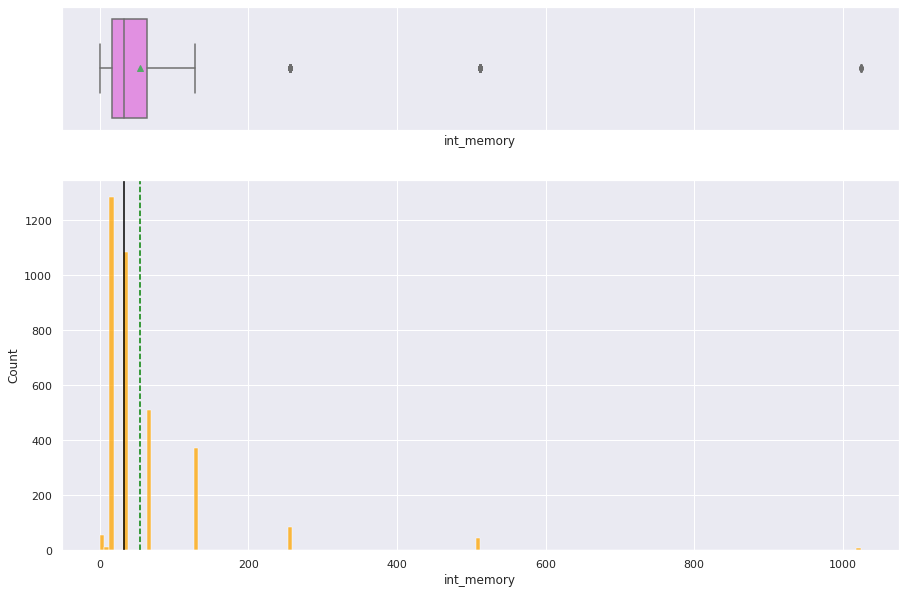

In [60]:
# create histogram and boxplot for phones and tablets internal memory
histogram_boxplot(df1, "int_memory")

In [61]:
# Check the new mean and median
print('mean =', df1['int_memory'].mean())
print('median =', df1['int_memory'].median())

mean = 54.52847423277359
median = 32.0


Observation:

* The mean decreased slightly from 54.57GB to 54.52GB, however, the median remains the same. 

#### RAM (Post Missing Value Treatment)

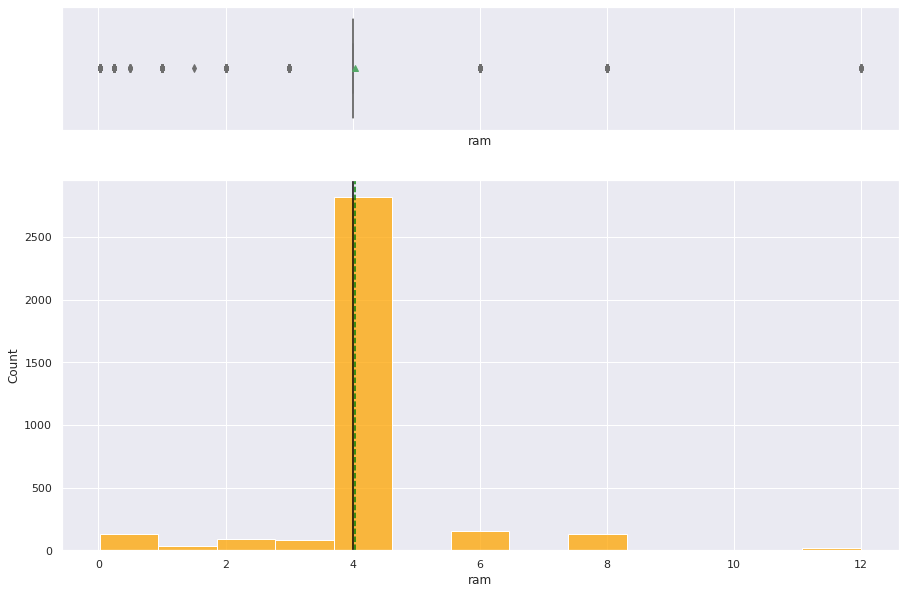

In [62]:
# create histogram and boxplot for phone and tablets RAM
histogram_boxplot(df1, "ram")

In [63]:
# Check the new mean and median
print('mean =', df1['ram'].mean())
print('median =', df1['ram'].median())

mean = 4.032620150550087
median = 4.0


Observation:

* The mean and median remain the same.

#### Battery (Post Missing Value Treatment)

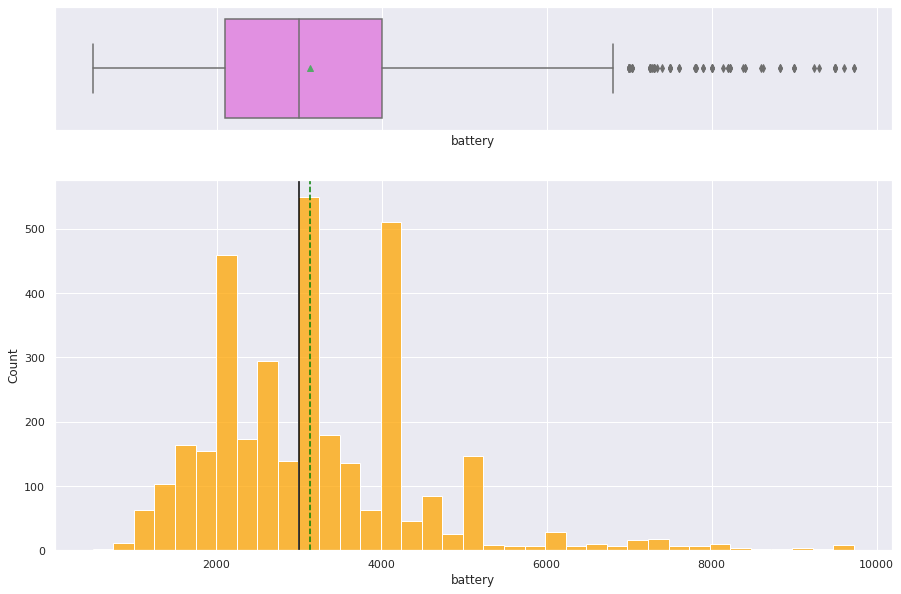

In [64]:
# create histogram and boxplot for phones and tablets batteries
histogram_boxplot(df1, "battery")

In [65]:
# Check the new mean and median
print('mean =', df1['battery'].mean())
print('median =', df1['battery'].median())

mean = 3132.5774464389115
median = 3000.0


Observation:

* The mean and median remain the same.

#### Weight (Post Missing Value Treatment)

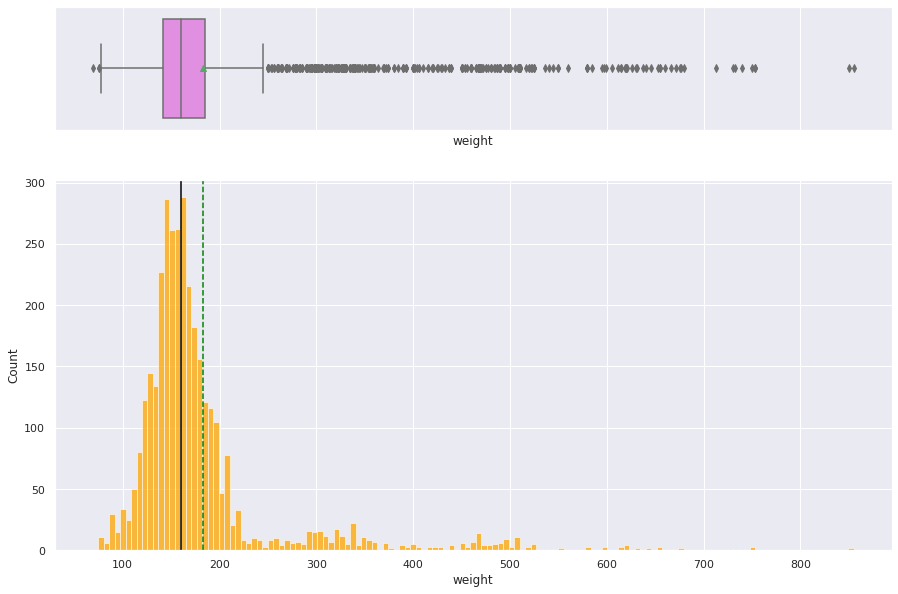

In [66]:
# create histogram and boxplot for phones and tablets weight
histogram_boxplot(df1, "weight")

In [67]:
# Check the new mean and median
print('mean =', df1['weight'].mean())
print('median =', df1['weight'].median())

mean = 182.63685581933987
median = 160.0


Observation:

* The mean decreases only slightly from 182.75g to 182.64g while the median remains the same.

### Bivariate Analysis

#### Brand name VS RAM (Post Missing Value Treatment)

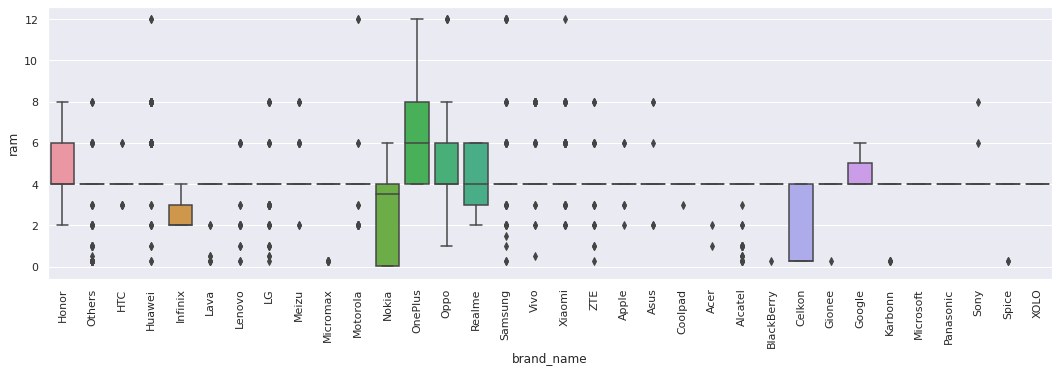

In [68]:
# Visualise the median, maximum, minimum, first and third quartiles of phones and tablets RAM according to the brands

plt.figure(figsize=(18, 5))
sns.boxplot(data=df1, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

Observation:

* There are no noticeable difference between pre-treatment and post-treatment of missing values.

#### Correlation Plot for Numerical Columns (Post Missing Value Treatment)

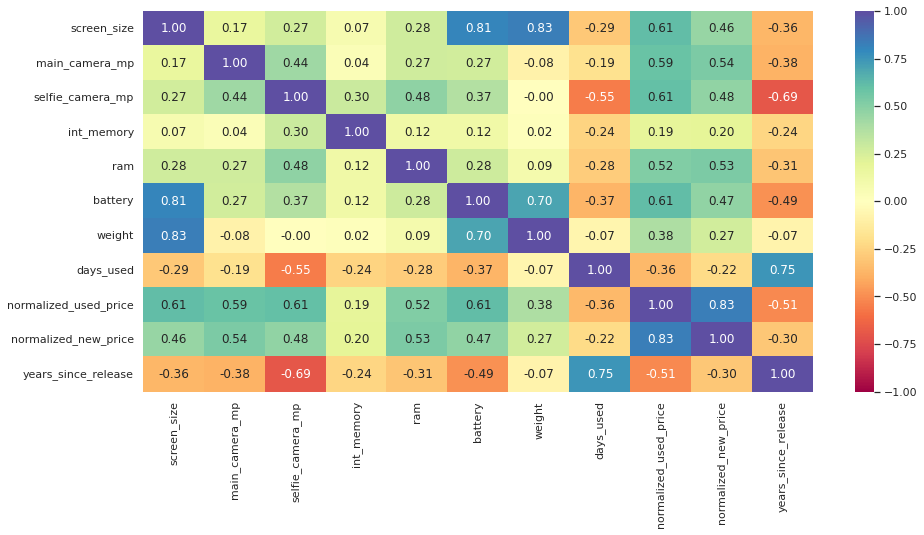

In [69]:
# Visualise the correlation among the numerical variables in the dataset
cols_list_2= df1.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list_2].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation:

* There is slight changes in the correlation between main_camera_mp and other features.

* Correlation between main_camera_mp and screen_size increase slightly.

* Main_camera_mp correlation with ram and battery increased from 0.26 and 0.25 to 0.27 and 0.27 respectively.

#### Battery Greater than 4500mAh (Post Missing Value Treatment)

In [70]:
# Determine the total number of batteries greater than 4500mAh
df1_large_battery = df1[df1['battery'] > 4500]
df1_large_battery.shape[0]

341

Observation:

* The number of batteries with energy rating greater than 4500mAh remain the same.

#### Scatterplot - Battery energy rating greater than 4500mAh (Post Missing Value Treatment)

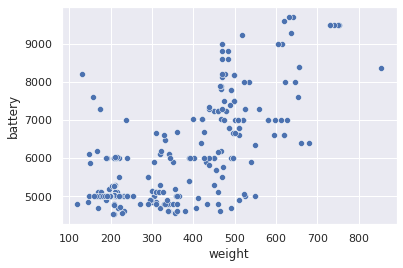

In [71]:
# Depict the scatterplot for weight and battery
sns.scatterplot(data=df1_large_battery, x="weight", y="battery")
plt.show()

Observation:

There are no noticeable difference between pre-treatment and post-treatment of missing values.

#### Brand name VS Weight (Post Missing Value Treatment)

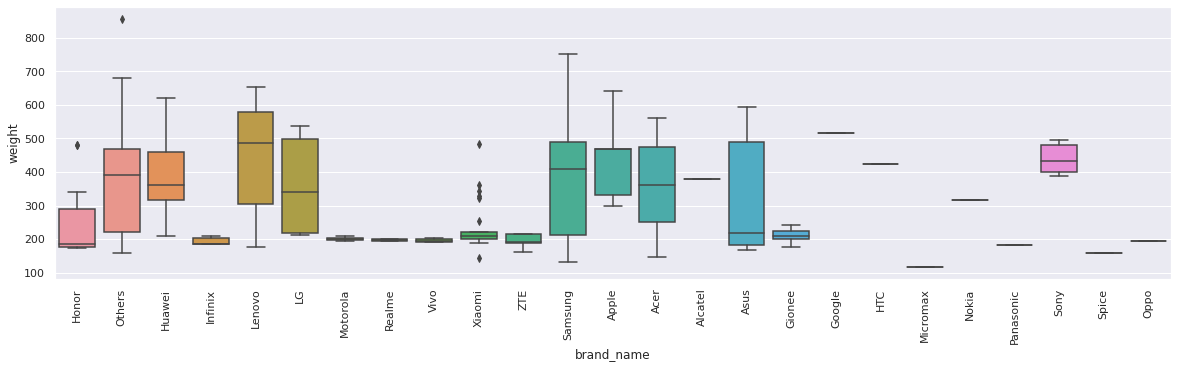

In [72]:
# Visualise the median, maximum, minimum, first and third quartiles of phones and tablets weight according to the brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=df1_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

Observation:

There are no noticeable difference between pre-treatment and post-treatment of missing values.

#### Screen Size Greater than 6 inches (Post Missing Value Treatment)

In [73]:
# Determine the total number of devices with screen size greater than 6 inches
df1_large_screen = df1[df1['screen_size'] > 6*2.54]
df1_large_screen.shape[0]

1099

Observation:

* The number screen sizes greater than 6 inches remains the same.

#### Selfie Camera Greater than 8MP (Post Missing Value Treatment)

In [74]:
# Determine the total number of tablets and phones having selfie cameras greater than 8MP
df1_selfie_camera_mp = df1[df1['selfie_camera_mp'] > 8]
df1_selfie_camera_mp.shape[0]

655

Observation:

* The number of devices having selfie cameras with MP greater than 8 does not change.

#### Main Camera Greater than 8MP (Post Missing Value Treatment)

Total of devices with main camera greater than 8MP

In [75]:
# Determine the total number of tablets and phones having main cameras greater than 8MP
df1_main_camera_mp = df1[df1['main_camera_mp'] > 8]
df1_main_camera_mp.shape[0]

1721

Observation:

* The number of main camera greater than 8MP increased from 1560 to 1721.

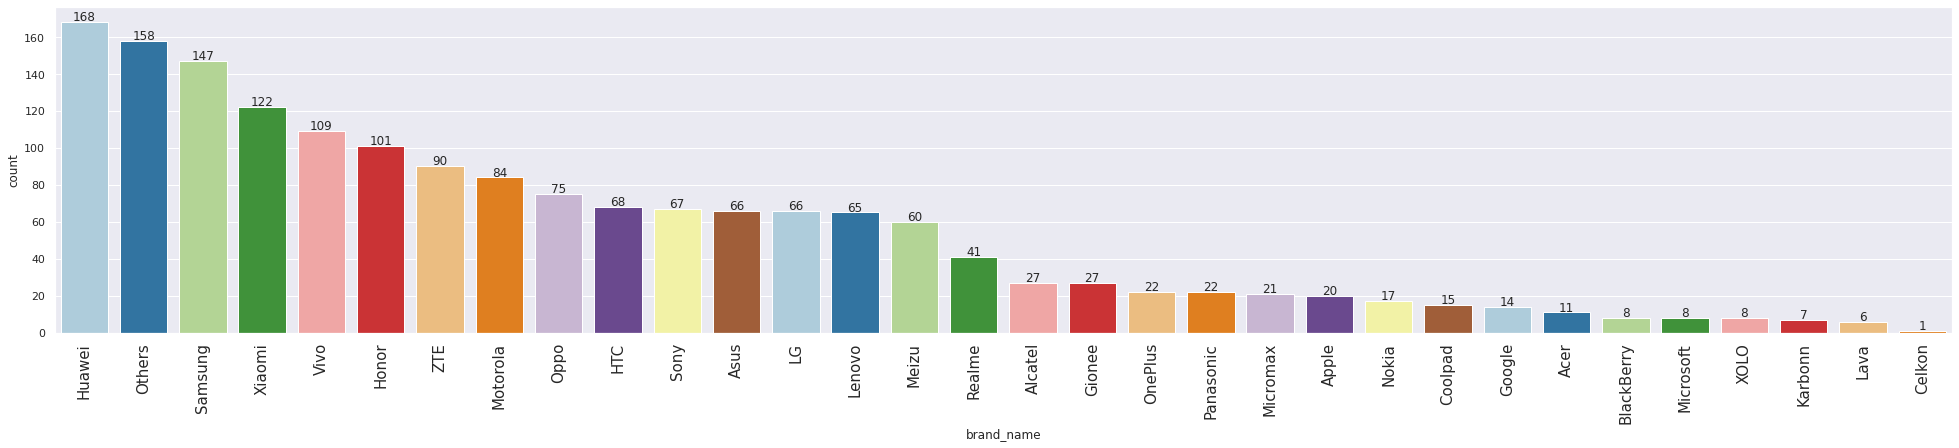

In [76]:
# Visualise the distribution of tablets and phones having main cameras of 8MP and above
labeled_barplot(df1_main_camera_mp,'brand_name', perc=False)

Observation:

* Huawei, Others, Samsung, Xiaomi, and Vivo, are the new topmost demanded devices with main camera greater than 8MP. 

* Microsoft, XOLO, Karbonn, Lava and Celkon are the new bottom devices with cameras greater than 8MP.

## Data Preparation for Modelling

To predict normalized used price of devices, the following steps will be taken.
- Define the predictor variables`
- Create dummy variables
- Split the data into train and test set in ratio 70:30
- Build the linear regression model using the train data
- Test the performance regression model's performance

Assign Dependent and Independent Variables

In [77]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

Add the intercept

In [78]:
# Add the intercept
import warnings
warnings.filterwarnings('ignore')
X = sm.add_constant(X)

Create Dummy Variables

In [79]:
# create dummy variables and show the top 5 rows
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Xiaomi,brand_name_ZTE,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,1,0,0,0,0,1,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,1,0,0,0,0,1,0,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,1,0,0,0,0,1,0,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,1,0,0,0,0,1,0,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,1,0,0,0,0,1,1,0


Split the dataset 70:30

In [80]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Display the top 5 rows of the train dataset

In [81]:
# display the top 5 rows of the train dataset
X_train.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Xiaomi,brand_name_ZTE,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,819,4.796204,...,0,0,1,0,0,0,1,0,1,0
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,585,5.434595,...,0,0,1,0,0,0,0,1,1,0
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,727,5.137914,...,0,0,1,0,0,0,1,0,1,0
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,126.0,800,5.189228,...,0,0,1,0,0,0,0,1,1,0
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,560,5.016220,...,0,0,1,0,0,0,0,1,1,0


Display the top 5 rows of the test dataset

In [82]:
# display the top 5 rows of the test dataset
X_test.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Xiaomi,brand_name_ZTE,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
866,1.0,15.24,8.00,2.0,16.0,4.00,3000.0,206.0,632,5.190788,...,0,0,1,0,0,0,1,0,1,0
957,1.0,10.16,3.15,0.3,512.0,0.25,1400.0,140.0,637,3.884652,...,0,0,1,0,0,0,1,0,1,0
280,1.0,15.39,8.00,8.0,32.0,2.00,5000.0,185.0,329,4.487287,...,0,0,1,0,0,0,0,1,1,0
2150,1.0,12.83,13.00,16.0,64.0,4.00,3200.0,148.0,648,5.639422,...,0,0,1,0,0,0,0,1,1,0
93,1.0,15.29,13.00,5.0,32.0,3.00,3500.0,179.0,216,5.300415,...,0,0,1,0,0,0,0,1,1,0


In [83]:
print("The total number of entries in the dataset =", X_train.shape[0] + X_test.shape[0])
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

The total number of entries in the dataset = 3454
Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [84]:
# build and fit a regression model 
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                           21:36:22   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpretation of R-squared

* From the training set, 84.5% of the variability of the target (normalized used price) can be explained.

### Interpretation of Coefficients

* The value for the constant = 0.5653

* In the training set, an increase of 1 cm in screen size will cause 0.0244 increase in the normalised used price of devices.

* An increase of 1MP in the main camera will lead to an increase of 0.0204 increase in normalised used price of devices.

* An increase of 1 Euro of the normalised new price results in an increase of 0.4311 rise in the normalised used price of devices.

* An increase in the battery energy rating leads to a decrease in the normalised used price of devices (however, slightly.

* From the correlation plot, battery and weight have a high correlation with screen size which suggest multicollinearity. However, tests will carried out to see how these features affect the normalised used price for devices.

### Interpretation of p-values (P > |t|)

* For each predictor variable there is a null hypothesis and alternate hypothesis.


    - Null hypothesis : Predictor variable is not significant 
    - Alternate hypothesis : Predictor variable is significant

* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

* Some p-values suggest that some predictor variable are not important.

* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

* After testing for the variance inflation factor (VIF) and removing multicollinearity, the p-values will be checked.


## Model Performance Check

Write a function to compute the Adjusted R-squared, R-squared, RMSE, MAE and MAPE

In [85]:

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

Display RMSE. MAE, R-squared, Adjusted R-squared and MAPE for the train and test dataset in a DataFrame.

In [86]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841407,4.326841


In [87]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.833986,4.501651


Observations

- The training and test sets, $R^2$ are 84.5% and 84.2% respectively, so the model is not underfitting since both values are comparable.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE of the test data shows that the regression model can predict normalised used price within a mean error of 0.24.


- According to the test data, the model is able to predict within 4.5% of the normalised used price for devices.

## Checking Linear Regression Assumptions

- To make confident statistical inferences from a linear regression model, assumptions of linear regression should be satisfied.

* We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**



### TEST FOR MULTICOLLINEARITY

* **Variance  Inflation Factor (VIF)** measures by how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.

* **General Rule of thumb that will be used**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is greater than 5 then treatment is required after considering the effect on the model due to dropping the feature. 
    - Assessment will be done by considering the effect on the adjusted R-squared value.

Define the function to compute the VIF

In [88]:
#import the library to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to compute VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

Determine the VIF

In [89]:
# check the VIF
import warnings
warnings.filterwarnings('ignore')
checking_vif(X_train)

,feature,VIF
0,const,0.000000
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


Observation:
* The VIF of the dummy variables are extremely high; at infinity and greater than 5. This implies high multicollinearity of dummy predictor variables.

* Also screen size and weight also exhibit VIF which is greater than 5 at 7.68 and 6.40 respectively.

* Multicollinearity will therefore be treated accordingly.

Function to treat multicollinearity.

In [90]:
# function to treat multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

Display the columns in the VIF DataFrame

In [91]:
# display the columns in the VIF DataFrame
col_vif_inf = checking_vif(X_train).columns.tolist()
col_vif_inf

['feature', 'VIF']

Observation:

* As expected the columns are 'feature'and 'VIF'

Make a list consisting of features with VIF larger than 5.

In [92]:
# make a list of the features having VIF greater than 5
vif_inf = checking_vif(X_train) [checking_vif(X_train) ['VIF'] > 5] 
col_list = vif_inf.feature.unique().tolist()


In [93]:
# make a dataframe of features having VIF greater than 5 and the corresponding Ajusted R-squared and RMSE of the model after dropping features
res = treating_multicollinearity(X_train, y_train, col_list)
res


,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Motorola,0.841742,0.232250
1,brand_name_XOLO,0.841742,0.232250
2,brand_name_Oppo,0.841742,0.232250
3,brand_name_Others,0.841742,0.232250
4,brand_name_Panasonic,0.841742,0.232250
5,brand_name_Realme,0.841742,0.232250
6,brand_name_Samsung,0.841742,0.232250
7,brand_name_Sony,0.841742,0.232250
8,brand_name_Spice,0.841742,0.232250
9,brand_name_Vivo,0.841742,0.232250


Observation:

* As expected the effect of dropping the dummy variables have the least effect on the Adjusted R-squared and RMSE followed by screen size feature.

* Weight has the highest effect on the Adjusted R-squared at 0.838071.

* However, the RMSE after dropping the dummy variables is lower but higher for screen size and highest for weight. 

In [94]:
# Determine the total number of multicollinear features
res.shape[0]

44

Observation:

* There are a total of 44 multicollinear features including all the dummy variables, screen size and weight.

#### Dropping Dummy Variables

Drop brand_name_Acer

In [95]:
# dropping dummy variable (brand_name_Acer)
X_train2 = X_train.drop(X_train.iloc[:, 11:12], axis=1)
X_test2 = X_test.drop(X_test.iloc[:, 11:12], axis=1)

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping brand_name_Acer ")
vif

VIF after dropping brand_name_Acer 


,feature,VIF
0,const,0.000000
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


In [96]:
# print the corresponding R-squared and Adjusted R-squared
olsmodel1 = sm.OLS(y_train, X_train2).fit()
print(
    "R-squared:",
    np.round(olsmodel1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmodel1.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


Observation:

* After dropping brand_name_Acer there still exist features with VIF greater than 5.

* The Adjusted R-squared value was not affected showing that the brand_name_Acer does not have any significant effect on the model. 

Drop brand_name_Apple which has the next highest VIF

In [97]:
# dropping dummy variable (brand_name_Apple)
X_train3 = X_train2.drop(['brand_name_Apple'], axis=1)
X_test3 = X_test2.drop(['brand_name_Apple'], axis=1)

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping brand_name_Apple")
vif

VIF after dropping brand_name_Apple


,feature,VIF
0,const,0.000000
1,screen_size,7.643583
2,main_camera_mp,2.284429
3,selfie_camera_mp,2.791121
4,int_memory,1.364138
5,ram,2.273686
6,battery,4.079720
7,weight,6.394014
8,days_used,2.659799
9,normalized_new_price,3.102417


In [98]:
# print the corresponding R-squared and Adjusted R-squared after dropping brand_name_Apple
olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(
    "R-squared:",
    np.round(olsmodel2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmodel2.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


Observation:

* After dropping brand_name_Apple there still exist features with VIF greater than 5.

* The Adjusted R-squared value was not affected showing that brand_name_Apple does not have any significant effect on the model. 

Drop brand_name_Others

In [99]:
# dropping dummy variable (brand_name_Others)
X_train4 = X_train3.drop(["brand_name_Others"], axis=1)
X_test4 = X_test3.drop(["brand_name_Others"], axis=1)
# Check VIF now
vif = checking_vif(X_train4)
print("VIF after dropping brand_name_Others")
vif

VIF after dropping brand_name_Others


,feature,VIF
0,const,0.000000
1,screen_size,7.570160
2,main_camera_mp,2.282967
3,selfie_camera_mp,2.789316
4,int_memory,1.363494
5,ram,2.270179
6,battery,4.079499
7,weight,6.368105
8,days_used,2.659536
9,normalized_new_price,3.101340


In [100]:
# print the corresponding R-squared and Adjusted R-squared after dropping brand_name_Others
olsmodel3 = sm.OLS(y_train, X_train4).fit()
print(
    "R-squared:",
    np.round(olsmodel3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmodel3.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


Observation:

* After dropping brand_name_Others there still exist features with VIF greater than 5.

* The Adjusted R-squared value was not affected showing that brand_name_Others does not have any significant effect on the model. 

Drop os_Android which is the next highest feature with the least significance on the model.

In [101]:
# dropping dummy variable (os_Android)
X_train5 = X_train4.drop(["os_Android"], axis=1)
X_test5 = X_test4.drop(["os_Android"], axis=1)
# Check VIF now
vif = checking_vif(X_train5)
print("VIF after dropping os_Android")
vif

VIF after dropping os_Android


,feature,VIF
0,const,0.000000
1,screen_size,7.570160
2,main_camera_mp,2.282967
3,selfie_camera_mp,2.789316
4,int_memory,1.363494
5,ram,2.270179
6,battery,4.079499
7,weight,6.368105
8,days_used,2.659536
9,normalized_new_price,3.101340


In [102]:
# print the corresponding R-squared and Adjusted R-squared after dropping os_Android
olsmodel4 = sm.OLS(y_train, X_train5).fit()
print(
    "R-squared:",
    np.round(olsmodel4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmodel4.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


Observation:

* After dropping os_Android there still exist features with VIF greater than 5.

* The Adjusted R-squared value was not affected showing that os_Andorid does not have any significant effect on the model. 

Drop 4g_no which is the next highest feature with the least significance on the model.

In [103]:
# dropping dummy variable (4g_no)
X_train6 = X_train5.drop(["4g_no"], axis=1)
X_test6 = X_test5.drop(["4g_no"], axis=1)
# Check VIF now
vif = checking_vif(X_train6)
print("VIF after dropping 4g_no")
vif

VIF after dropping 4g_no


,feature,VIF
0,const,0.000000
1,screen_size,7.570160
2,main_camera_mp,2.282967
3,selfie_camera_mp,2.789316
4,int_memory,1.363494
5,ram,2.270179
6,battery,4.079499
7,weight,6.368105
8,days_used,2.659536
9,normalized_new_price,3.101340


In [104]:
# print the corresponding R-squared and Adjusted R-squared after dropping os_Android
olsmodel5 = sm.OLS(y_train, X_train6).fit()
print(
    "R-squared:",
    np.round(olsmodel5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmodel5.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


Observation:

* After dropping 4g_no there still exist features with VIF greater than 5.

* The Adjusted R-squared value was not affected showing that 4g_no does not have any significant effect on the model. 

Drop 5g_no which is the next highest feature with the least significance on the model.

In [105]:
# dropping dummy variable (5g_no)
X_train7 = X_train6.drop(["5g_no"], axis=1)
X_test7 = X_test6.drop(["5g_no"], axis=1)
# Check VIF now
vif = checking_vif(X_train7)
print("VIF after dropping 5g_no")
vif

VIF after dropping 5g_no


,feature,VIF
0,const,150.393434
1,screen_size,7.570160
2,main_camera_mp,2.282967
3,selfie_camera_mp,2.789316
4,int_memory,1.363494
5,ram,2.270179
6,battery,4.079499
7,weight,6.368105
8,days_used,2.659536
9,normalized_new_price,3.101340


In [106]:
# print the corresponding R-squared and Adjusted R-squared after dropping 5g_no
olsmodel6 = sm.OLS(y_train, X_train7).fit()
print(
    "R-squared:",
    np.round(olsmodel6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmodel6.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


Observation:

* After dropping 5g_no there still exist features with VIF greater than 5.

* The Adjusted R-squared value was not affected showing that 5g_no does not have any significant effect on the model. 

Drop screen_size which is the next highest feature with the least significance on the model.

In [107]:
# dropping dummy variable (screen_size)
X_train8 = X_train7.drop(["screen_size"], axis=1)
X_test8 = X_test7.drop(["screen_size"], axis=1)
# Check VIF now
vif = checking_vif(X_train8)
print("VIF after dropping screen_size")
vif

VIF after dropping screen_size


,feature,VIF
0,const,132.560513
1,main_camera_mp,2.279942
2,selfie_camera_mp,2.787261
3,int_memory,1.361141
4,ram,2.270071
5,battery,3.832887
6,weight,2.988543
7,days_used,2.648067
8,normalized_new_price,3.053912
9,years_since_release,4.715423


In [108]:
# print the corresponding R-squared and Adjusted R-squared after dropping screen_size
olsmodel7 = sm.OLS(y_train, X_train8).fit()
print(
    "R-squared:",
    np.round(olsmodel7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmodel7.rsquared_adj, 3),
)

R-squared: 0.841 
Adjusted R-squared: 0.838


Observation:

* There is no multicollinearity after removing screen_size.

* The Adjusted R-squared value was only slightly affected. The Adjusted R-squared has reduced to 0.838 from 0.842. Indicating that screen_size has a significant effect on the model. However it has been removed since its coefficient cannot be reliable. 

* The VIF for all features is less than 5.

Display the model and coefficients

In [109]:
#build and fit the model
olsmodel7 = sm.OLS(y_train, X_train8).fit()
print(olsmodel7.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     279.6
Date:                   Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                           21:36:27   Log-Likelihood:                 97.446
No. Observations:                   2417   AIC:                            -102.9
Df Residuals:                       2371   BIC:                             163.5
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- Unimportant features will be dropped stepwisely as follows:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.



Drop unimportant features and make a list of columns with p-value less than 0.05

In [110]:
# initial list of columns
predictors = X_train8.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


Assign the train and test set with only the important features

In [111]:
# make a new DataFrame train and test set with variable having p-value less than 0.05
X_train9 = X_train8[selected_features]
X_test9 = X_test8[selected_features]

Display the new model with only important features

In [112]:
# build and fit a model after removing the unimportant features
olsmodel8 = sm.OLS(y_train, X_train9).fit()
print(olsmodel8.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1042.
Date:                   Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                           21:36:27   Log-Likelihood:                 77.391
No. Observations:                   2417   AIC:                            -128.8
Df Residuals:                       2404   BIC:                            -53.51
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [113]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel8_train_perf = model_performance_regression(olsmodel8, X_train9, y_train)
olsmodel8_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234346,0.18324,0.838806,0.837934,4.407828


In [114]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel8_test_perf = model_performance_regression(olsmodel8, X_test9, y_test)
olsmodel8_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24162,0.187535,0.838138,0.836081,4.576213


**Observations**

* Now no feature has p-value greater than 0.05.

* Now adjusted R-squared is 0.839. Therefore the model is able to explain 84% of the target variable. 

* The adjusted R-squared for *olsmodel7* , where the model was considered without multicollinearity, was 0.838. Now *olsmodel8* is still 0.838 depicting that the dropped features have no significant effect on the model.

* There is no large difference between the RMSE and MAE of the train and test sets, therefore, there is no overfitting.

### TEST FOR LINEARITY AND INDEPENDENCE

* For linearity we will test that the features have linear relationship with normalised_used_price. In carrying out the test, we will do the following:

  * Plot fitted values (predicted values) against the residuals (errors).
  * Check that there's no pattern.
  * No pattern depicts linearity and independence while pattern depicts non-linearity and not independent.

Create a dataframe with actual, fitted and residual values.

In [115]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel7.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel7.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.889973,0.197515
1525,4.448399,4.639771,-0.191371
1128,4.315353,4.332352,-0.016999
3003,4.282068,4.212352,0.069716
2907,4.456438,4.465159,-0.008721


Plot the Fitted Values against Residuals

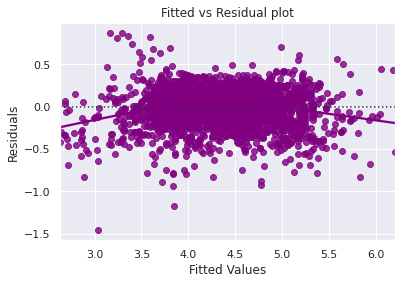

In [116]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Observation:

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* There is no pattern, therefore, the assumptions of linearity and independence are satisfied.
- **So, the assumption is satisfied.**

### TEST FOR NORMALITY

* For normality the residuals should be normally distributed. In carrying the test we will do the following:

  * Plot a histogram of the residuals and check the shape. A bell shaped, symmetrical plot depicts normality
  * Plot the Q-Q plot on a 45 degree diagonal. If the plot follows the diagonal line then the residuals are normally distributed.
  * Also, the Shapiro-Wilk test will be conducted. And if the p-value for the Shapiro-Wilk test is greater than 0.05 then the residuals are normally distributed.

    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed



**Histogram of Residuals**

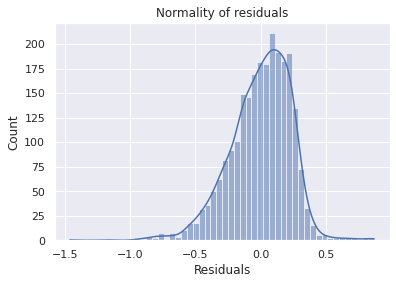

In [117]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals depicts a bell shape although not totally symmetrical.
- Let's check the Q-Q plot.

**Q-Q Plot**

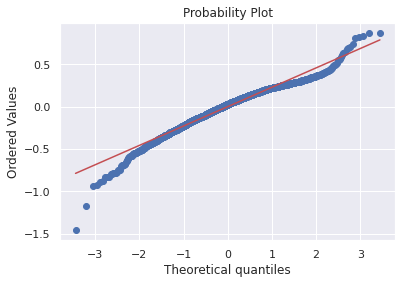

In [118]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals veer off at the tails.
- Let's check the results of the Shapiro-Wilk test.

**Shapiro-Wilks Test**

In [119]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9699773192405701, pvalue=4.380938153620675e-22)

Observation:

* Although the the p-value is less than 0.05 which means that the residuals are not normal from the Shapiro-Wilk test but the histogram of residuals forms a bell shape and Q-Q Plot is not waving across the diagonal.
- Therefore, we can accept the distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY


- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**Goldfeldquandt Test**

In [120]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train9)
lzip(name, test)

[('F statistic', 1.0169139833107366), ('p-value', 0.3859426772054762)]

Observation:

  - Since p-value > 0.05, we can say that the residuals are homoscedastic. **So, this assumption is satisfied.**

## Predictions on test data

In [121]:
# predictions on the test set
pred = olsmodel8.predict(X_test9)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.375586
2341,3.696103,3.996751
1913,3.592093,3.638879
688,4.306495,4.090899
650,4.522115,5.181496
2291,4.259294,4.386083
40,4.997685,5.438558
1884,3.875359,4.046193
2538,4.206631,4.062860
45,5.380450,5.220325


## Final Model Summary

Save the final model

In [122]:
# save the final model
x_train_final = X_train9.copy()
x_test_final = X_test9.copy()

Final Model

In [123]:
# create and fit the final model
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1042.
Date:                   Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                           21:36:28   Log-Likelihood:                 77.391
No. Observations:                   2417   AIC:                            -128.8
Df Residuals:                       2404   BIC:                            -53.51
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Final Model Performance Check

In [124]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234346,0.18324,0.838806,0.837934,4.407828


In [125]:
# checking model performance on train set (seen 70% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24162,0.187535,0.838138,0.836081,4.576213


* The model is able to explain approximately 84% of the variation in the data

* Across the train and tests the RMSE and MAE are comparable, therefore, there is no overfitting.

* The MAPE on the test set suggests we can predict within 4.6% of the normalised price of used devices.

* Hence, we can conclude the model *olsmodel_final* is suitable for prediction as well as inference purposes.

## Actionable Insights and Recommendations 

1. The model is suitable for prediction as it can explain 84% of the variation in the data and within 4.6% error for nomalised used price on the test data.


2. If the megapixel of main cameras increase by one unit, then the normalized used prices of the phones and tablets also increase by 0.021 units, all other variables held constant.

3. If the megapixel of selfie cameras increase by one unit, then the normalized used prices of the phones and tablets also increase by 0.0143 units, all other variables held constant.


4. If the RAM of phones and tablets increase by one unit, then the normalized used prices of the phones and tablets also increase by 0.0208 units, all other variables held constant.


5. As years since release increases by one unit, then the normalized used prices of the phones and tablets decrease by 0.0297 units, all other variables held constant.


6. As the price of the new versions of phones and tablets increase, the normalised used price of devices also increase by 0.4348, all other variables held constant.
  - Recently released devices are more expensive than older devices.

7. As the weight of phones and tablets increase, the normalised used price of devices also increase by 0.0016, all other variables held constant.


8. ReCell can focus on the selling used and refurbished devices released no later than 4 years as the years since release influences the normalised used price significantly.


9. ReCell should focus more on the sale of brands like Huawei, Samsung, Xiaomi, Vivo and Honor as these seem like the most demanded devices and less on the sale of brands like Celkon, Realme, OnePlus, Lava and Karbonn which are the 5 least desirable brands.


10. ReCell can gather more data on features that motivate users choice of devices. Although Samsung has the greatest weight in grams among all the devices. ReCell can gather more data to determine the features that motivate users choices.


11. ReCell can conduct deeper analysis of the normalised used price and normalised new price of devices with 4 GB across all brands to gain more insight on how prices of 4 GB devices vary across the different brands.


___